<a href="https://colab.research.google.com/github/saathisudip/Machine-Learning-Based-Predictive-Maintenance-System-for-Industrial-Equipment/blob/main/machine_learning_based_predictive_maintenance_model_for_industrial_equipment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Predictive Maintenance System Based on Machine Learning for Industrial Equipments***#

This project on Predictive Maintenance Using Machine Learning aims to revolutionize industrial equipment maintenance through advanced data analytics. The primary goal is to develop a robust predictive maintenance system capable of anticipating and addressing potential issues before they lead to critical breakdowns.



#**Importing Machine Learning and Vizualization Libraries**#

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

#**Loading Data**#
**Data is available at [Microsoft Azure Predictive Maintenance dataset from Kaggle](https://www.kaggle.com/datasets/arnabbiswas1/microsoft-azure-predictive-maintenance)**



In [ ]:
machines = pd.read_csv('/content/PdM_machines.csv')
Telemetry= pd.read_csv("/content/PdM_telemetry.csv")
errors= pd.read_csv("/content/PdM_errors.csv")
maintenance= pd.read_csv("/content/PdM_maint.csv")
failures = pd.read_csv('/content/PdM_failures.csv')

***
#**Exploratory Data Analysis(EDA)**#

***
#*EDA on Machines dataset(PdM_machines.csv)*#
***

In [ ]:
# Checking the first five rows of the data. The dataset contains the machineID, model of the machine and age of the machine.
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [ ]:
# Counting the number of missing values in each column of the 'machines' dataset.
machines.isna().sum()

machineID    0
model        0
age          0
dtype: int64

In [ ]:
# Generating descriptive statistics for numerical columns in the 'machines' DataFrame
machines.describe()

,machineID,age
count,100.000000,100.000000
mean,50.500000,11.330000
std,29.011492,5.856974
min,1.000000,0.000000
25%,25.750000,6.750000
50%,50.500000,12.000000
75%,75.250000,16.000000
max,100.000000,20.000000


In [ ]:
#Converting the 'model' column in the 'machines' DataFrame to the 'object' data type
machines['model'] = machines['model'].astype('object')

Text(0, 0.5, 'Count')

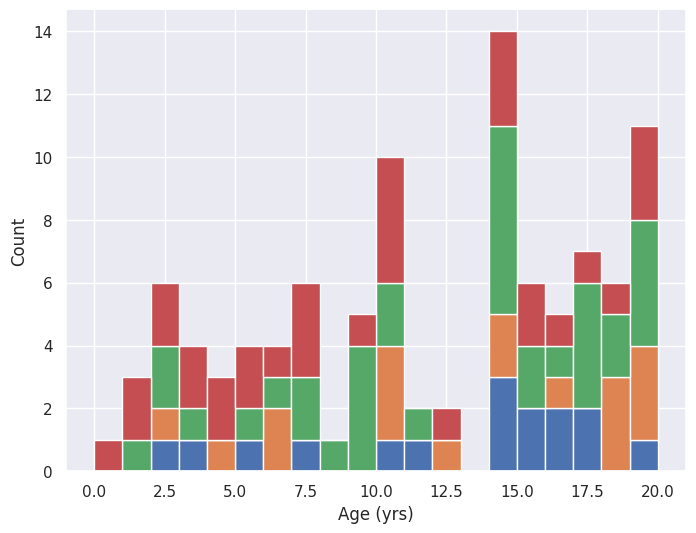

In [ ]:
# Setting the plot style to "darkgrid"
sns.set_style("darkgrid")

# Creating a figure with a specified size
plt.figure(figsize=(8, 6))

# Creating a stacked histogram for the 'age' column based on different machine models
_, bins, _ = plt.hist(
    [
        machines.loc[machines['model'] == 'model1', 'age'],
        machines.loc[machines['model'] == 'model2', 'age'],
        machines.loc[machines['model'] == 'model3', 'age'],
        machines.loc[machines['model'] == 'model4', 'age']
    ],
    20,  # Number of bins
    stacked=True,  # Stacking the histograms
    label=['model1', 'model2', 'model3', 'model4']  # Labelling for each model
)

# Setting the x-axis label
plt.xlabel('Age (yrs)')

# Setting the y-axis label
plt.ylabel('Count')

In [ ]:
import plotly.express as px

# Creating a stacked histogram using Plotly Express
fig = px.histogram(
    machines,  # DataFrame
    x='age',  # Data for x-axis
    color='model',  # Data for color (stacking by model)
    barmode='stack',  # Stacked bars
    title='Machine Age Distribution',  # Title of the plot
    template='plotly_dark',  # Dark theme template
    labels={'age': 'Age', 'model': 'Model'},  # Custom axis labels
    category_orders={'model': ['model1', 'model2', 'model3', 'model4']}  # Order of categories on the color axis
)

# Showing the interactive plot
fig.show()

***
#*EDA on the Telemetry dataset (PdM_telemetry.csv)*#
***

In [ ]:
# Displaying the first few rows of the 'Telemetry' DataFrame
Telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [ ]:
# Checking for missing values in the 'Telemetry' DataFrame
Telemetry.isnull().sum()

datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
dtype: int64

In [ ]:
# Displaying concise information about the 'Telemetry' DataFrame using the .info() method.
Telemetry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   datetime   876100 non-null  object 
 1   machineID  876100 non-null  int64  
 2   volt       876100 non-null  float64
 3   rotate     876100 non-null  float64
 4   pressure   876100 non-null  float64
 5   vibration  876100 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 40.1+ MB


In [ ]:
#Double checking the machine count
Telemetry["machineID"].value_counts()

1      8761
64     8761
74     8761
73     8761
72     8761
       ... 
31     8761
30     8761
29     8761
28     8761
100    8761
Name: machineID, Length: 100, dtype: int64

In [ ]:
# Generating descriptive statistics of the 'Telemetry' DataFrame
Telemetry.describe()

,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


In [ ]:
# Converting the 'datetime' column in the 'Telemetry' DataFrame to datetime
Telemetry["datetime"] = pd.to_datetime(Telemetry['datetime'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
#Getting the beginning and start date of this data
Telemetry["datetime"].describe()

<ipython-input-16-7020ba7de0dc>:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                  876100
unique                   8761
top       2015-01-01 06:00:00
freq                      100
first     2015-01-01 06:00:00
last      2016-01-01 06:00:00
Name: datetime, dtype: object

In [ ]:
# Extracting data from the 'Telemetry' DataFrame for machineID 1 on the start date '2015-01-01'.
# The condition checks for both the machineID and the date part of the 'datetime' column.

startdate_data = Telemetry[(Telemetry['machineID'] == 1) & (Telemetry['datetime'].dt.date == pd.to_datetime('2015-01-01').date())]

# Displaying the data for the specified start date.
print(startdate_data)

# Printing the count of records in the 'startdate_data' DataFrame.
print(startdate_data.count())

# Extracting data from the 'Telemetry' DataFrame for machineID 1 on another day, '2015-01-02'.
otherday = Telemetry[(Telemetry['machineID'] == 1) & (Telemetry['datetime'].dt.date == pd.to_datetime('2015-01-02').date())]

# Displaying the data for the specified other day.
print(otherday)

# Printing the count of records in the 'otherday' DataFrame.
print(otherday.count())

              datetime  machineID        volt      rotate    pressure  \
0  2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1  2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2  2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3  2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4  2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   
5  2015-01-01 11:00:00          1  172.504839  430.323362   95.927042   
6  2015-01-01 12:00:00          1  156.556031  499.071623  111.755684   
7  2015-01-01 13:00:00          1  172.522781  409.624717  101.001083   
8  2015-01-01 14:00:00          1  175.324524  398.648781  110.624361   
9  2015-01-01 15:00:00          1  169.218423  460.850670  104.848230   
10 2015-01-01 16:00:00          1  167.060981  382.483543  103.780663   
11 2015-01-01 17:00:00          1  160.263954  448.084256   96.480976   
12 2015-01-01 18:00:00          1  153.353492  490.

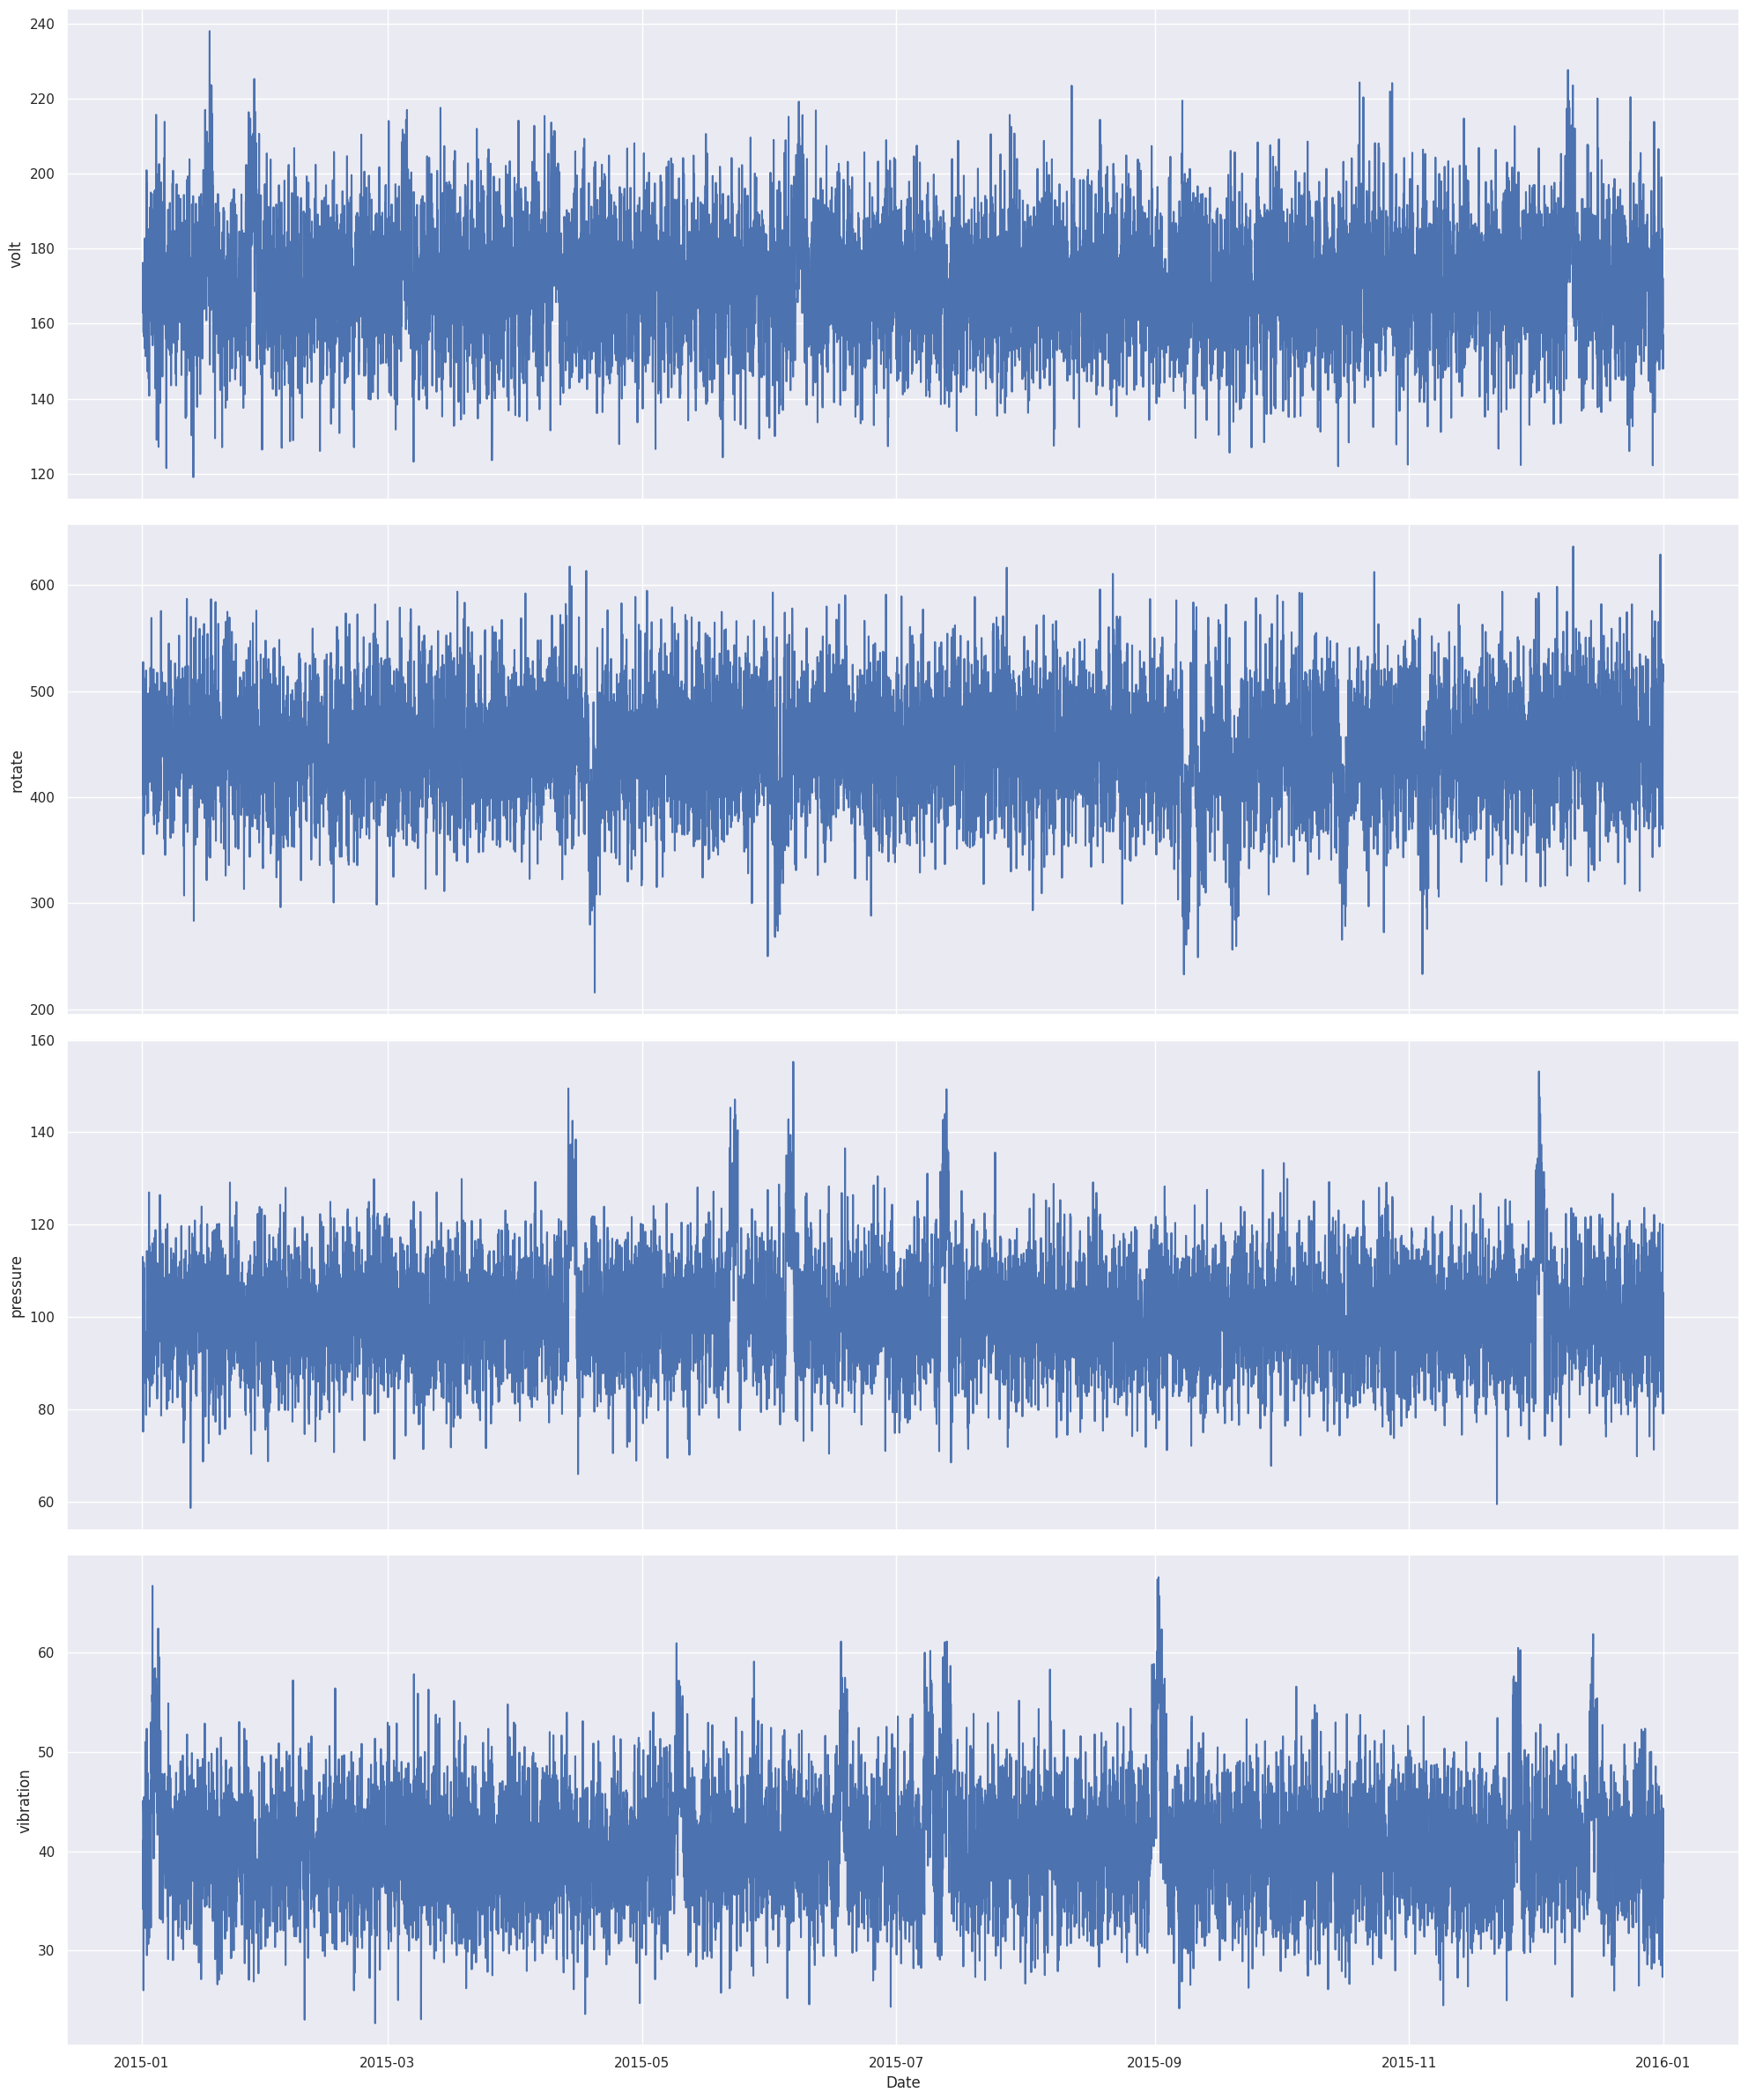

In [ ]:
# Plotting of all sensor elements for machine 1 for the entire year 2015-2016
import matplotlib.pyplot as plt

# Filter the data for machine 1 and the year 2015
machine_1_2015 = Telemetry[(Telemetry['machineID'] == 1) & (Telemetry['datetime'].dt.year == 2015)]

# Create subplots for each sensor
sensors = ['volt', 'rotate', 'pressure', 'vibration']
num_sensors = len(sensors)

fig, axs = plt.subplots(num_sensors, 1, figsize=(20, 6 * num_sensors), sharex=True)

for i, sensor in enumerate(sensors):
    ax = axs[i]
    ax.plot(machine_1_2015['datetime'], machine_1_2015[sensor])
    ax.set_ylabel(sensor)

plt.xlabel('Date')
plt.tight_layout()
plt.show()


In [ ]:
# Creating a new DataFrame 'Telemetry_with_datetime' by assigning new columns
# representing the year, month, and hour extracted from the 'datetime' column
# in the original 'Telemetry' DataFrame.

Telemetry_with_datetime = Telemetry.assign(
    year=Telemetry["datetime"].dt.year,
    month=Telemetry["datetime"].dt.month,
    hours=Telemetry["datetime"].dt.hour)

# Creating a new DataFrame 'volt_graph' by grouping the 'Telemetry_with_datetime' DataFrame
# based on the year, month, and machineID, and calculating the mean of the 'volt' column.

# The result is then reset_index() to convert the grouped result back to a DataFrame.
volt_graph = Telemetry_with_datetime.groupby(['year', 'month', 'machineID'])['volt'].mean().reset_index()

# Displaying the 'volt_graph' DataFrame, which now contains the average voltage for each machine
# in each year and month.
volt_graph


,year,month,machineID,volt
0,2015,1,1,172.616892
1,2015,1,2,171.980008
2,2015,1,3,170.689776
3,2015,1,4,170.973860
4,2015,1,5,169.158095
...,...,...,...,...
1295,2016,1,96,163.701974
1296,2016,1,97,175.247124
1297,2016,1,98,174.122791
1298,2016,1,99,169.200437


In [ ]:
Telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


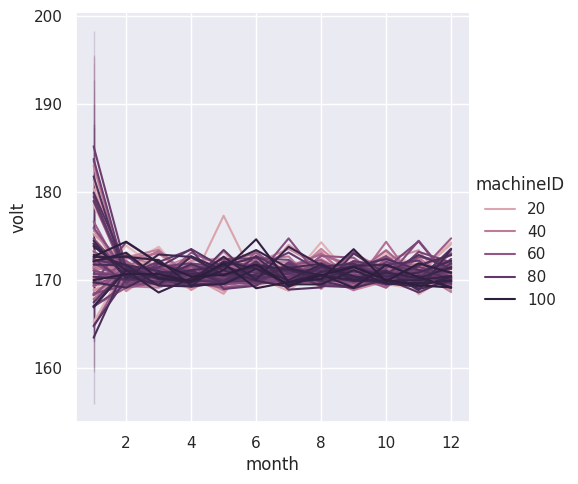

In [ ]:
# Creating a relational plot using Seaborn's relplot function.
sns.relplot(
    data=volt_graph, kind="line",
    x="month", y="volt", hue="machineID",
    sort=False)

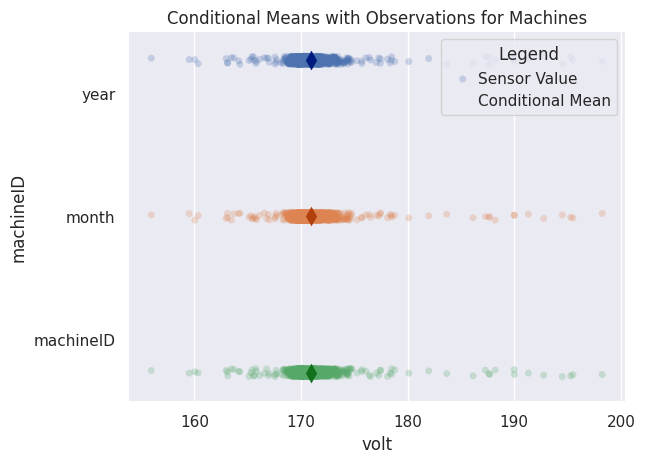

In [ ]:
# Reshaping the 'volt_graph' DataFrame using the melt function from pandas.
volt_graph = volt_graph.melt(id_vars="volt", var_name="machineID")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(
    data=volt_graph, x="volt", y="machineID", hue="machineID",
    dodge=True, alpha=0.25, zorder=1, legend=False
)

# Show the conditional means (mean sensor values)
sns.pointplot(
    data=volt_graph, x="volt", y="machineID", hue="machineID",
    dodge=0.8 - 0.8 / 3, palette="dark", markers="d"
)

# Customize the legend (optional)
ax.legend(title="Legend", labels=['Sensor Value', 'Conditional Mean'], loc="upper right", frameon=True, handletextpad=0)

# Add a title (optional)
plt.title("Conditional Means with Observations for Machines")

plt.show()

***
#*EDA on the Errors dataset (PdM_errors.csv)*#
***

In [ ]:
# checking errors dataset
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [ ]:
errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3919 non-null   object
 1   machineID  3919 non-null   int64 
 2   errorID    3919 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.0+ KB


In [ ]:
errors.describe()

,machineID
count,3919.000000
mean,51.044654
std,28.954988
min,1.000000
25%,25.000000
50%,51.000000
75%,77.000000
max,100.000000


In [ ]:
errors.isna().sum()

datetime     0
machineID    0
errorID      0
dtype: int64

In [ ]:
#making sure that there are 100 machines
errors.machineID.value_counts()

22    60
78    54
99    54
49    51
81    51
      ..
19    28
86    27
31    26
6     23
77    22
Name: machineID, Length: 100, dtype: int64

In [ ]:
#chaninging datetime to date time format and making extra columns for month year and hourrs
errors["datetime"] = pd.to_datetime(errors['datetime'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
errors_with_datetime = errors.assign(
    datetime=pd.to_datetime(errors['datetime'], format='%Y-%m-%d %H:%M:%S'),
    year=errors["datetime"].dt.year,
    month=errors["datetime"].dt.month,
    hours=errors["datetime"].dt.hour)

In [ ]:
errors_with_datetime

,datetime,machineID,errorID,year,month,hours
0,2015-01-03 07:00:00,1,error1,2015,1,7
1,2015-01-03 20:00:00,1,error3,2015,1,20
2,2015-01-04 06:00:00,1,error5,2015,1,6
3,2015-01-10 15:00:00,1,error4,2015,1,15
4,2015-01-22 10:00:00,1,error4,2015,1,10
...,...,...,...,...,...,...
3914,2015-11-21 08:00:00,100,error2,2015,11,8
3915,2015-12-04 02:00:00,100,error1,2015,12,2
3916,2015-12-08 06:00:00,100,error2,2015,12,6
3917,2015-12-08 06:00:00,100,error3,2015,12,6


In [ ]:
#checking the start and end time of the errors
errors["datetime"].describe()

<ipython-input-31-3a06ce7b53a4>:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                    3919
unique                   2720
top       2015-12-08 06:00:00
freq                       12
first     2015-01-01 06:00:00
last      2016-01-01 05:00:00
Name: datetime, dtype: object

In [ ]:
# counting the number of errors
#error 1 seems to be the most frequent
errors["errorID"].value_counts()


error1    1010
error2     988
error3     838
error4     727
error5     356
Name: errorID, dtype: int64

In [ ]:
#checking the total number of error types per month
error_month = errors_with_datetime.groupby(["month", "errorID"]).size().reset_index(name="monthly_error_count")
error_month

,month,errorID,monthly_error_count
0,1,error1,96
1,1,error2,81
2,1,error3,79
3,1,error4,69
4,1,error5,33
5,2,error1,89
6,2,error2,62
7,2,error3,59
8,2,error4,44
9,2,error5,37


In [ ]:
#checking the most frequent error that  occurs per  month
max_error_per_month = error_month.groupby('month')['monthly_error_count'].idxmax()
max_errors = errors_with_datetime.loc[max_error_per_month]
max_errors

# it seems that error one and two is the most frequent type of errors to occur

,datetime,machineID,errorID,year,month,hours
0,2015-01-03 07:00:00,1,error1,2015,1,7
5,2015-01-25 15:00:00,1,error4,2015,1,15
10,2015-03-26 01:00:00,1,error2,2015,3,1
15,2015-05-04 23:00:00,1,error2,2015,5,23
21,2015-06-18 06:00:00,1,error5,2015,6,6
25,2015-09-01 06:00:00,1,error5,2015,9,6
31,2015-10-16 06:00:00,1,error2,2015,10,6
36,2015-02-06 10:00:00,2,error4,2015,2,10
40,2015-03-18 06:00:00,2,error2,2015,3,6
46,2015-05-07 08:00:00,2,error2,2015,5,8


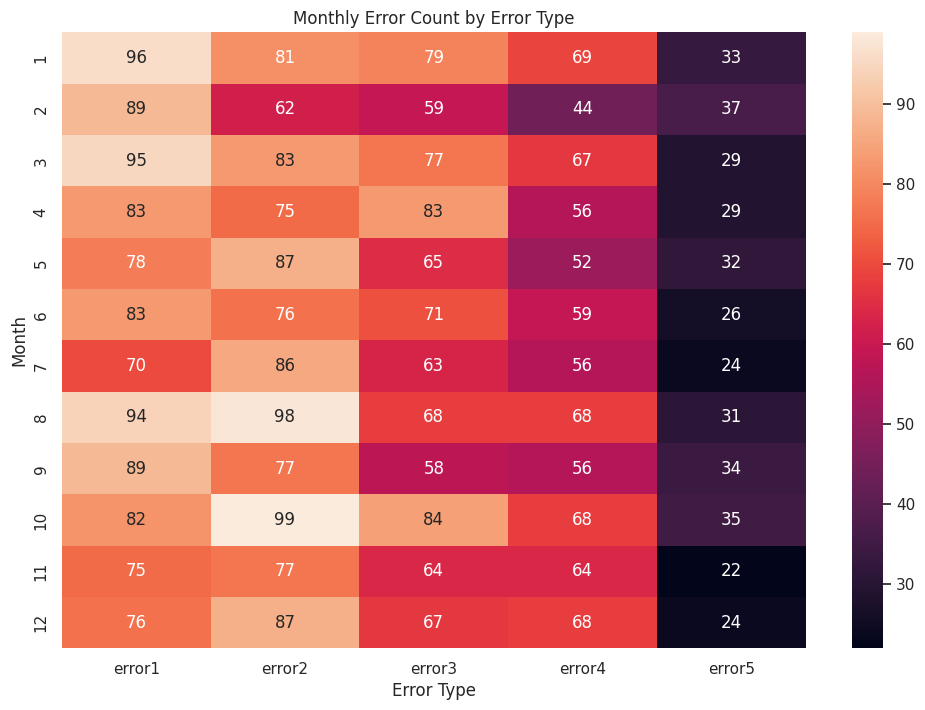

In [ ]:
# Setting up the figure size for the upcoming heatmap plot using matplotlib.
plt.figure(figsize=(12, 8))

# Creating a pivot table from the 'error_month' DataFrame.
# The index is set to "month," columns to "errorID," and values to "monthly_error_count."
# The 'fill_value' parameter is set to 0 to fill any missing values with zeros.

heatmap_data = error_month.pivot_table(index="month", columns="errorID", values="monthly_error_count", fill_value=0)

# Setting the color palette for the heatmap using Seaborn's color_palette function.
# The "rocket" palette is used here.

sns.color_palette("rocket", as_cmap=True)

# Creating a heatmap using Seaborn's heatmap function.
# The 'annot' parameter is set to True to display the numeric values in each cell,
# and 'fmt="d"' is used to format the displayed values as integers.

sns.heatmap(heatmap_data, annot=True, fmt="d")

# Setting the title of the heatmap.
plt.title("Monthly Error Count by Error Type")

# Setting the x-axis label.
plt.xlabel("Error Type")

# Setting the y-axis label.
plt.ylabel("Month")

plt.show()

In [ ]:
# Calculating the total amount of errors per machineID by grouping the 'errors' DataFrame.
# The count of 'errorID' is used to represent the total number of errors for each machineID.

total_error_count = errors.groupby(["machineID"])["errorID"].count()

# Resetting the index to convert the grouped result into a DataFrame.
total_error_count = total_error_count.reset_index()

# Creating a new column 'total_errors' in the DataFrame to store the total error counts.
total_error_count["total_errors"] = total_error_count["errorID"]

# Dropping the original 'errorID' column, as it is no longer needed in the final result.
total_error_count = total_error_count.drop(['errorID'], axis=1)


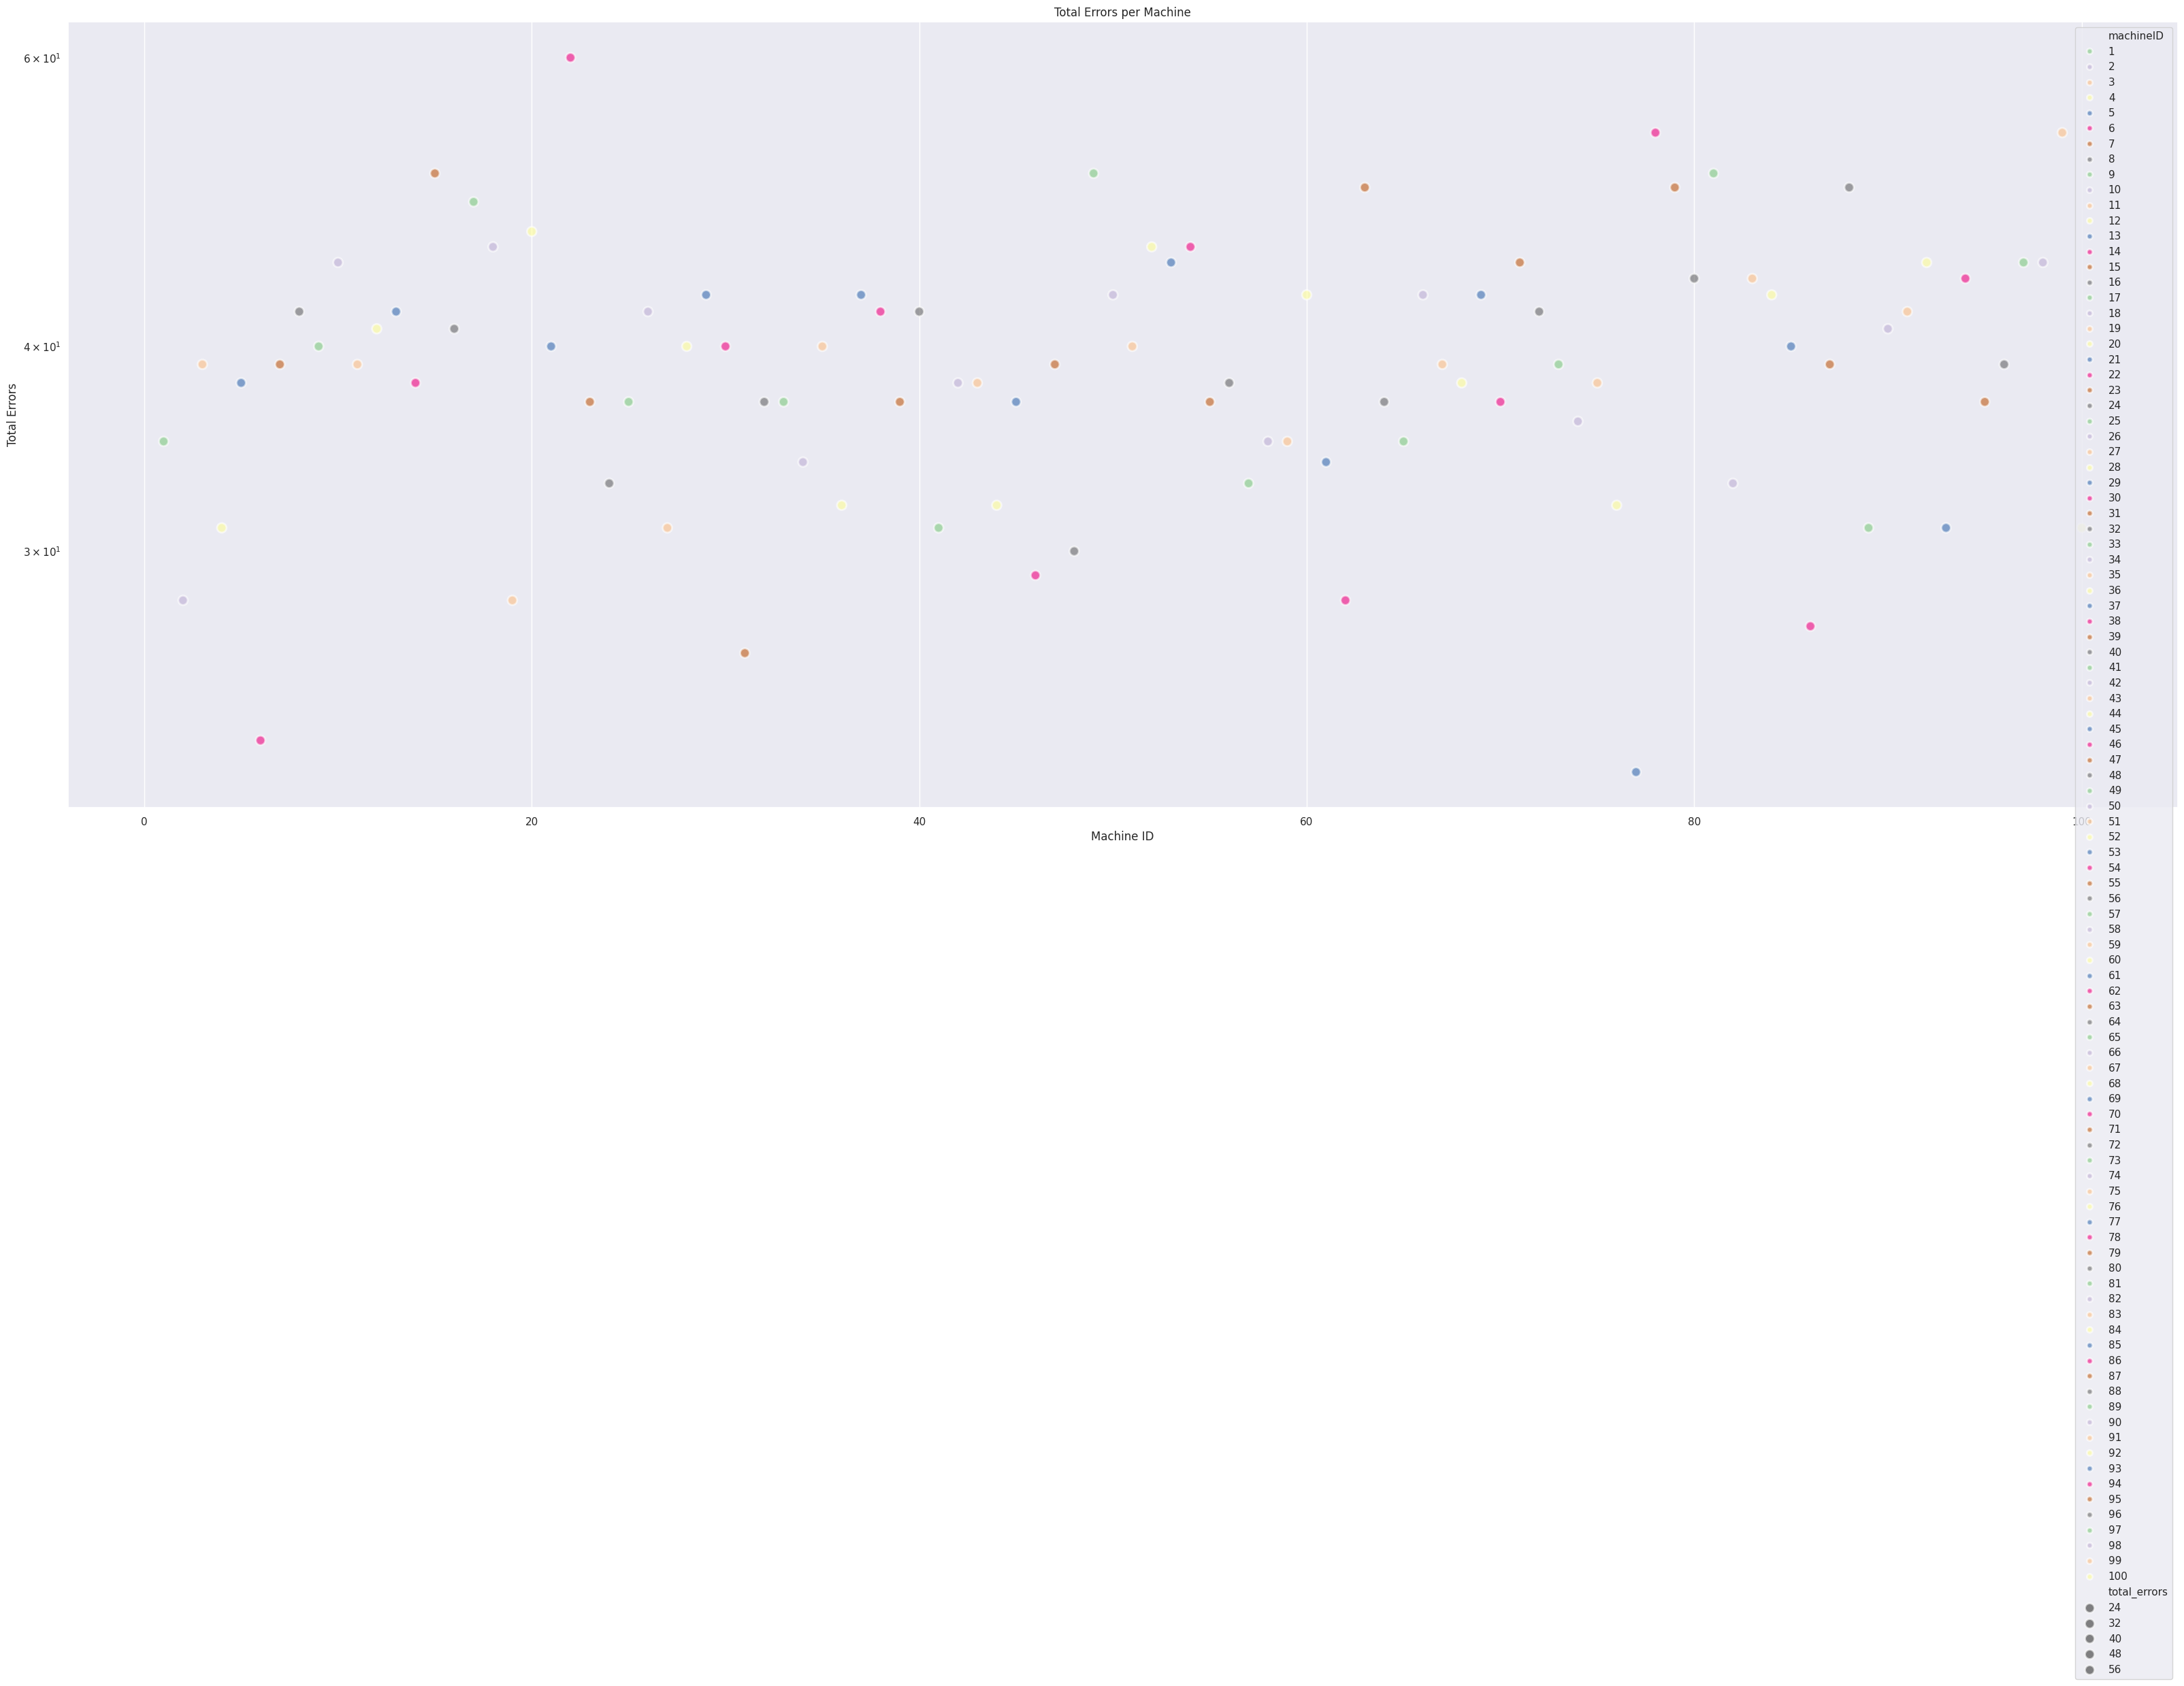

In [ ]:
# Setting the figure size for the scatterplot using matplotlib.
plt.figure(figsize=(40, 15))

# Scatterplot
sns.scatterplot(
    data=total_error_count,
    x="machineID",
    y="total_errors",
    size="total_errors",  # Use total_errors for bubble size
    sizes=(100, 100),  # Adjust the size range as needed
    hue="machineID",
    palette="Accent",
    alpha=0.6,
    edgecolors="white",
    linewidth=2
)

# Setting the y-axis scale to logarithmic for better visualization of data spread.
plt.yscale('log')

# Adding labels to the x-axis and y-axis.
plt.xlabel("Machine ID")
plt.ylabel("Total Errors")

# Adding a title to the scatterplot.
plt.title("Total Errors per Machine")

# Rotating x-axis ticks for better readability.
plt.xticks(rotation=0)

plt.show()

In [ ]:
# Creating a bar chart using Plotly Express.
fig = px.bar(x=errors['errorID'].values,
             title='Count of Types of Errors', template='simple_white', color=errors['errorID'])

# Updating the layout of the chart.

# Adding titles to the x-axis and y-axis.
fig.update_layout(xaxis_title='Error Type', yaxis_title='Count')

# Updating the traces (bars) with a color scale.
fig.update_traces(marker=dict(colorscale='Viridis'))

# Displaying the interactive bar chart.
fig.show()

In [ ]:
errors

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4
...,...,...,...
3914,2015-11-21 08:00:00,100,error2
3915,2015-12-04 02:00:00,100,error1
3916,2015-12-08 06:00:00,100,error2
3917,2015-12-08 06:00:00,100,error3


In [ ]:
# Calculating the general count of each machineID's errors and the amount of those errors that the machine encounters.

# Grouping the 'errors' DataFrame by both 'machineID' and 'errorID'.
# The count() function is applied to calculate the number of occurrences for each combination.

machine_error_count = errors.groupby(["machineID", "errorID"]).count()

# Resetting the index to convert the grouped result into a DataFrame.
machine_error_count = machine_error_count.reset_index()

# Creating a new column 'error_count' in the DataFrame to store the count of errors for each combination.
machine_error_count['error_count'] = machine_error_count['datetime']

# Selecting only the necessary columns 'machineID', 'errorID', and 'error_count'.
machine_error_count = machine_error_count[['machineID', 'errorID', 'error_count']]


In [ ]:
#checking the exact error_count per error ID for a speficied machineID
machine_error_count[machine_error_count["machineID"]==23]

,machineID,errorID,error_count
108,23,error1,8
109,23,error2,9
110,23,error3,6
111,23,error4,6
112,23,error5,8


In [ ]:
# Creating a bar chart using Plotly Express.
import plotly.express as px

fig = px.bar(machine_error_count.reset_index(), x="machineID", y="error_count", color="errorID", title="Count of Errors per Machine",
             labels={"count": "Count", "errorID": "Error Type", "machineID": "Machine ID"})

fig.show()


***
#*EDA on the Maint dataset(PdM_maint.csv)*#
***

In [ ]:
maintenance.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [ ]:
maintenance.isnull().sum()

datetime     0
machineID    0
comp         0
dtype: int64

In [ ]:
maintenance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3286 non-null   object
 1   machineID  3286 non-null   int64 
 2   comp       3286 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.1+ KB


In [ ]:
maintenance.describe()

,machineID
count,3286.000000
mean,50.284236
std,28.914478
min,1.000000
25%,25.250000
50%,50.000000
75%,75.000000
max,100.000000


In [ ]:
# Converting the 'datetime' column in the 'maintenance' DataFrame to datetime format using

maintenance["datetime"] = pd.to_datetime(maintenance['datetime'], format='%Y-%m-%d %H:%M:%S')

# Converting the 'comp' column in the 'maintenance' DataFrame to the 'category' data type.

maintenance['comp'] = maintenance['comp'].astype('category')


In [ ]:
# sorting datetime and machine_ID in ascending order
maintenance.sort_values(["datetime", "machineID"], inplace=True, ignore_index=True)

In [ ]:
# Sorting maintanance data
maintenance.sort_values()

<bound method DataFrame.sort_values of                 datetime  machineID   comp
0    2014-06-01 06:00:00          1  comp2
1    2014-06-01 06:00:00          6  comp2
2    2014-06-01 06:00:00          9  comp1
3    2014-06-01 06:00:00          9  comp2
4    2014-06-01 06:00:00         11  comp2
...                  ...        ...    ...
3281 2016-01-01 06:00:00         35  comp2
3282 2016-01-01 06:00:00         42  comp4
3283 2016-01-01 06:00:00         43  comp1
3284 2016-01-01 06:00:00         55  comp3
3285 2016-01-01 06:00:00         78  comp3

[3286 rows x 3 columns]>

*Maintenance data has the date from June 2014, where other dataset are present from 2015. Therefore, finding missing dates between 2014 & 2015*

In [ ]:
def get_missing_dates(datetime, start_date, end_date, freq="H"): #It returns the missing dates in datetime betweeb start and end date
  return pd.date_range(start=start_date, end=end_date, freq=freq).difference(datetime)

In [ ]:
#This function, get_missing_dates, takes a datetime column (maintenance.datetime) and returns the missing dates within a specified range.
get_missing_dates(maintenance.datetime,
                  start_date="2014-06-01 06:00:00",
                  end_date="2016-01-01 06:00:00",
                  freq='H')

DatetimeIndex(['2014-06-01 07:00:00', '2014-06-01 08:00:00',
               '2014-06-01 09:00:00', '2014-06-01 10:00:00',
               '2014-06-01 11:00:00', '2014-06-01 12:00:00',
               '2014-06-01 13:00:00', '2014-06-01 14:00:00',
               '2014-06-01 15:00:00', '2014-06-01 16:00:00',
               ...
               '2015-12-31 20:00:00', '2015-12-31 21:00:00',
               '2015-12-31 22:00:00', '2015-12-31 23:00:00',
               '2016-01-01 00:00:00', '2016-01-01 01:00:00',
               '2016-01-01 02:00:00', '2016-01-01 03:00:00',
               '2016-01-01 04:00:00', '2016-01-01 05:00:00'],
              dtype='datetime64[ns]', length=13523, freq=None)

***
#Components are replaced in two cases:

* Technician replaced it during regularly scheduled visit (Proactive Maintenance)

* A component fails, and then the technician performs unscheduled maintenance to replace the component (Reactive Maintenance).
***


#Plot number of maintenance records across month
***


# Number of maintenance records across 'machineID'
***

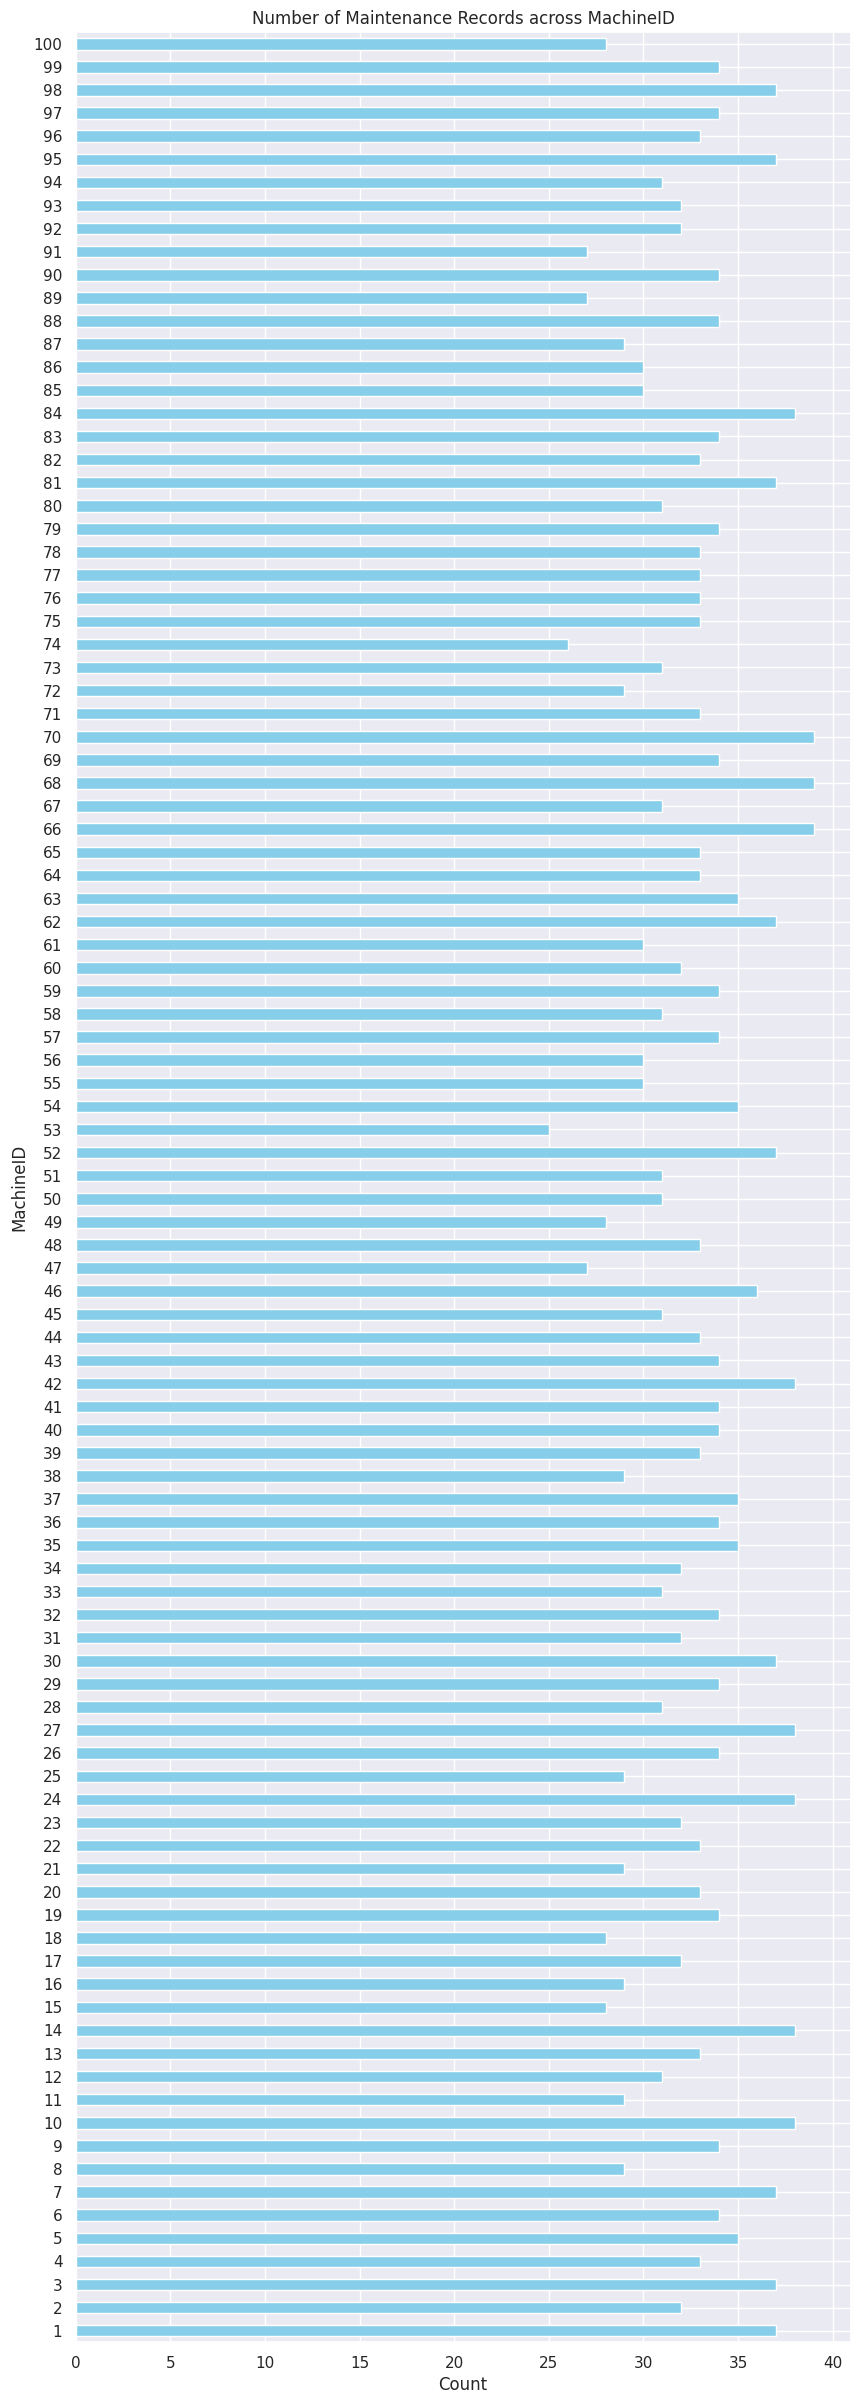

In [ ]:
maintenance_counts = maintenance['machineID'].value_counts()

# Sortting the counts by machineID in ascending order
maintenance_counts_sorted = maintenance_counts.sort_index()

plt.figure(figsize=(10, 30))
maintenance_counts_sorted.plot(kind='barh', color='skyblue')
plt.title('Number of Maintenance Records across MachineID')
plt.xlabel('Count')
plt.ylabel('MachineID')
plt.show()

***
#Total no. of maintenance records
***

In [ ]:
#This code converts the 'comp' column in the maintenance DataFrame to a categorical data type
maintenance['comp'] = maintenance['comp'].astype('category')
print("Total Number of maintenance Records: %d" %len(maintenance.index))
maintenance.head()

Total Number of maintenance Records: 3286


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-06-01 06:00:00,6,comp2
2,2014-06-01 06:00:00,9,comp1
3,2014-06-01 06:00:00,9,comp2
4,2014-06-01 06:00:00,11,comp2


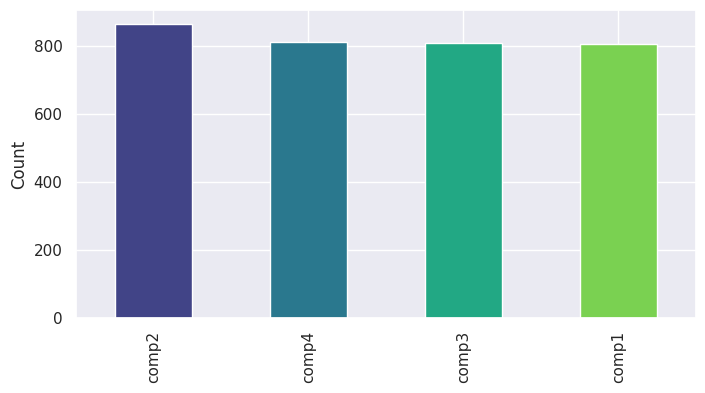

In [ ]:
#Bar plot to visualize the counts of each category in the 'comp' column
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))

comp= maintenance['comp'].value_counts()
color_palette = sns.color_palette("viridis", len(comp))

maintenance['comp'].value_counts().plot(kind='bar', color=color_palette)

plt.ylabel('Count')


plt.show()

<ipython-input-55-274b9e154f1a>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




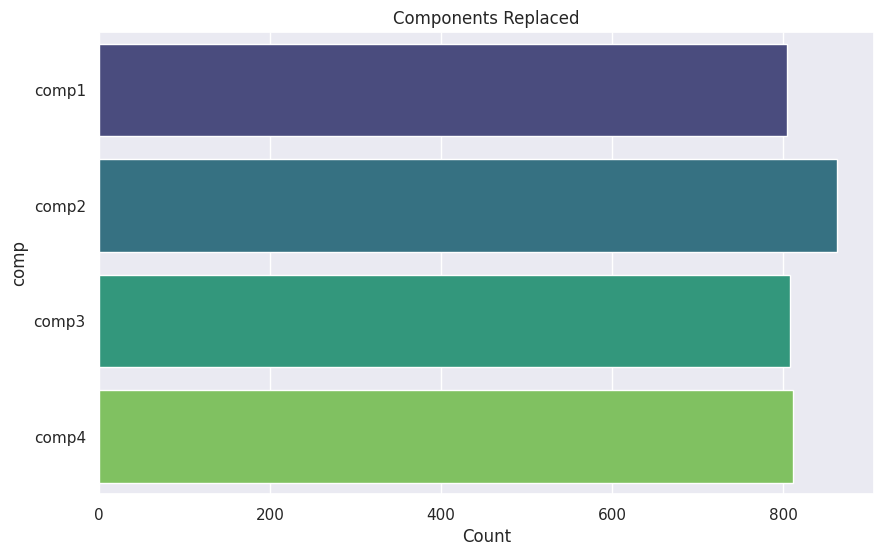

In [ ]:
def plot_barh(data, feature_name, figsize=(10, 6), normalize=False, title=None):
    # Counting the occurrences of each unique value in the specified feature
    component_counts = data[feature_name].value_counts(normalize=normalize)

    # Creating a horizontal bar plot using Viridis color palette
    plt.figure(figsize=figsize)
    sns.barplot(x=component_counts.values, y=component_counts.index, palette="viridis")

    # Setting plot title and labels
    plt.title(title if title else f"{feature_name} Counts")
    plt.xlabel("Count")
    plt.ylabel(feature_name)

    # Displaying the plot
    plt.show()

# Example usage
plot_barh(maintenance,
          feature_name="comp",
          figsize=(10, 6),
          normalize=False,
          title="Components Replaced")

***
#Number of maintenance record across time
***

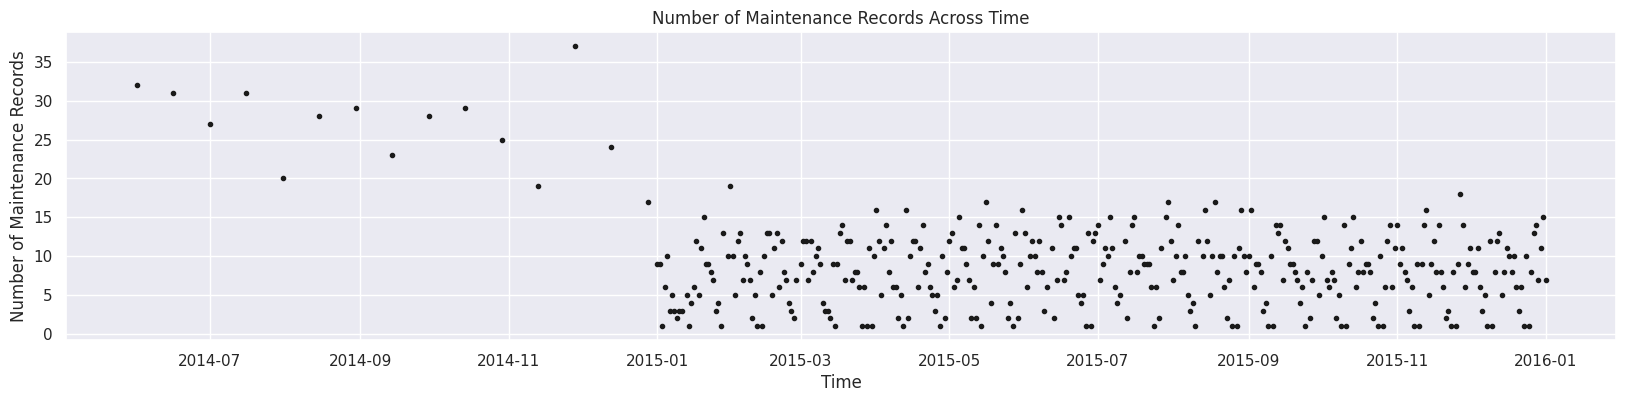

In [ ]:
maintenance['datetime'] = pd.to_datetime(maintenance['datetime'], errors='coerce')

# Ensuring that the column has datetime-like values, if not, it will contain NaT (Not a Time)
maintenance["datetime"].dt.date.dropna().value_counts().plot(
    style="k.",
    figsize=(20, 4)
)

plt.title("Number of Maintenance Records Across Time")
plt.ylabel("Number of Maintenance Records")
plt.xlabel("Time")
plt.show()

***
# Count occurrences of each 'comp' value per 'machineid'
***

In [ ]:
result = maintenance.groupby(['machineID', 'comp']).count()
result = result.reset_index()
result['comp_count'] = result['datetime']
result = result[['machineID', 'comp', 'comp_count']]

import plotly.express as px

color_discrete_map = {'comp1': 'black', 'comp2': 'blue', 'comp3': 'pink', 'comp4': 'orange'}

fig = px.bar(result.reset_index(), x="machineID", y="comp_count", color="comp", title="Count of Comp per MachineID",
             labels={"count": "Count", "errorID": "Error Type", "machineID": "Machine ID"},
             color_discrete_map=color_discrete_map)

fig.show()


***
#*EDA on the Failures dataset(PdM_failures.csv)*#
***



In [ ]:
failures.head()


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [ ]:
#Calculating and displaying the count of null values for each column in the "failures" dataset.
failures.isna().sum()

datetime     0
machineID    0
failure      0
dtype: int64

In [ ]:
# Counting the number of records in failures
len(failures.index)

761

In [ ]:
# Checking data type in failures
failures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   761 non-null    object
 1   machineID  761 non-null    int64 
 2   failure    761 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.0+ KB


In [ ]:
# Converting object to datetime
failures['datetime'] = pd.to_datetime(failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('object')

In [ ]:
failures.describe()

,machineID
count,761.000000
mean,51.911958
std,29.515542
min,1.000000
25%,24.000000
50%,51.000000
75%,79.000000
max,100.000000


***
#Displaying Count of different failure types#
***

<ipython-input-64-c3e5b85c27cb>:2: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



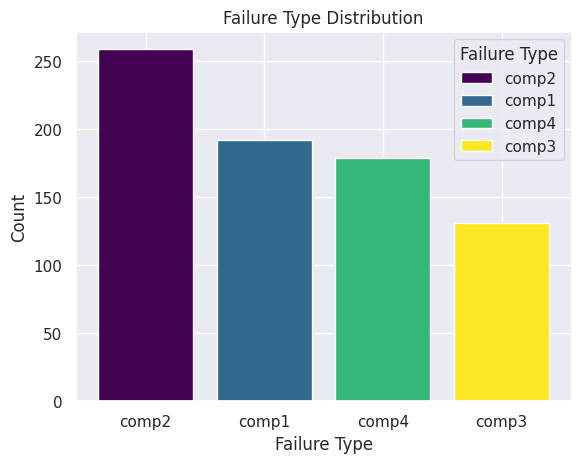

In [ ]:
failure_counts = failures['failure'].value_counts()
colors = plt.cm.get_cmap('viridis', len(failure_counts))
bars = plt.bar(failure_counts.index, failure_counts, color=colors(np.arange(len(failure_counts))))
plt.legend(bars, failure_counts.index, title='Failure Type')

plt.title('Failure Type Distribution')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.show()

***
#Displaying errors and failures for machine ID= 1#
***

In [ ]:
telemetryP = Telemetry.loc[Telemetry['machineID'] == 1].reset_index(drop=True)
fail1 = failures.loc[failures['machineID'] == 1]
err1 = errors.loc[errors['machineID'] == 1]

<ipython-input-66-341f82d7f7ce>:9: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



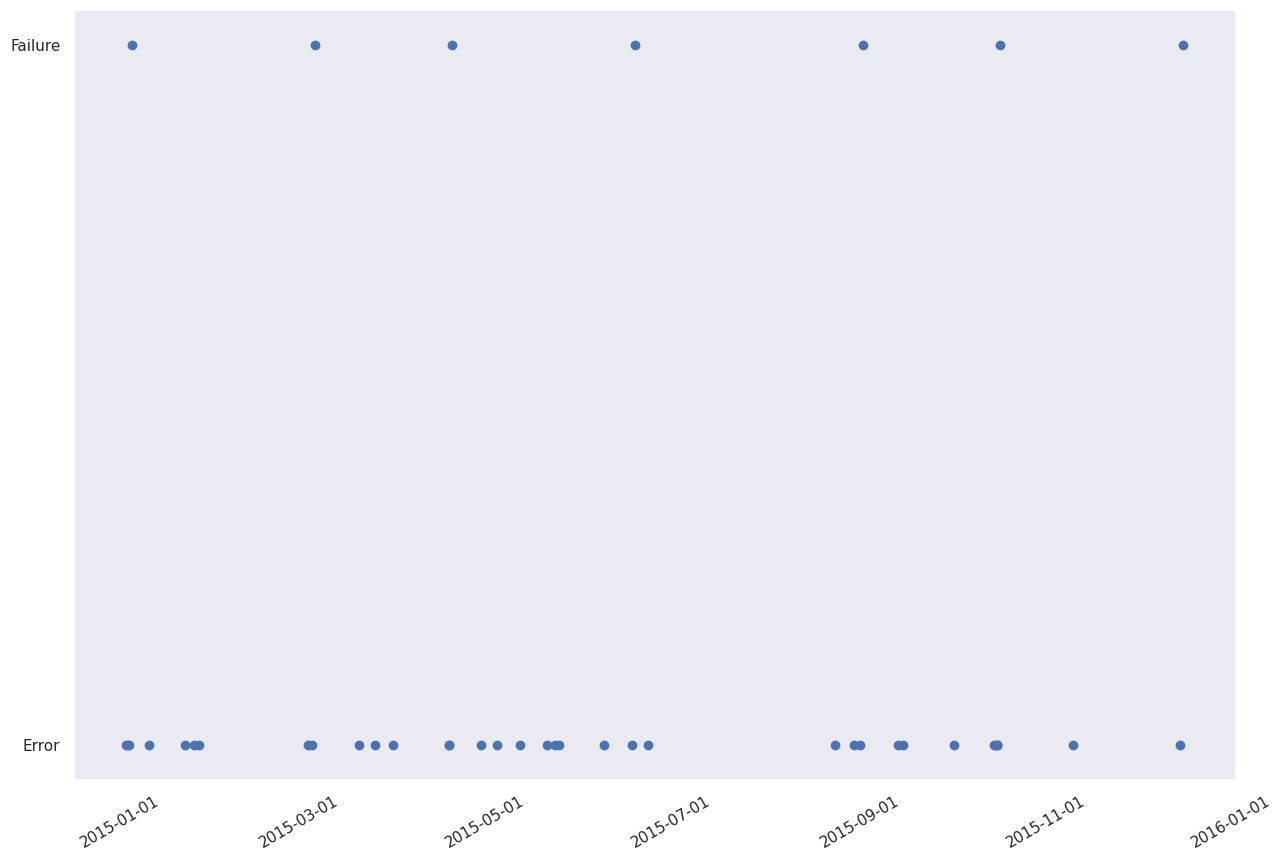

In [ ]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15, 10))

y_category = ['Failure'] * len(fail1) + ['Error'] * len(err1)

df_timestamp = pd.concat([fail1['datetime'], err1['datetime']], ignore_index=True, axis=0)
df_plot = pd.DataFrame({"timestamp": df_timestamp, "category": y_category})
df_plot.loc[:, 'timestamp'] = pd.to_datetime(df_plot.loc[:, 'timestamp'])
df_plot.sort_values(by=['timestamp'], inplace=True, ignore_index=True)

ax.scatter('timestamp', 'category', data=df_plot)
yearfmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(yearfmt)
ax.tick_params(axis='x', rotation=30)
ax.grid()

plt.show()

***
#**Check Autocorellation for Machine ID = 1**#
***

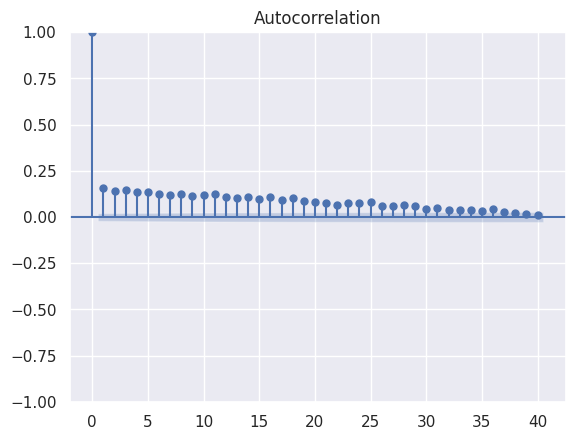

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(telemetryP['pressure'], lags = 40)
plt.show()

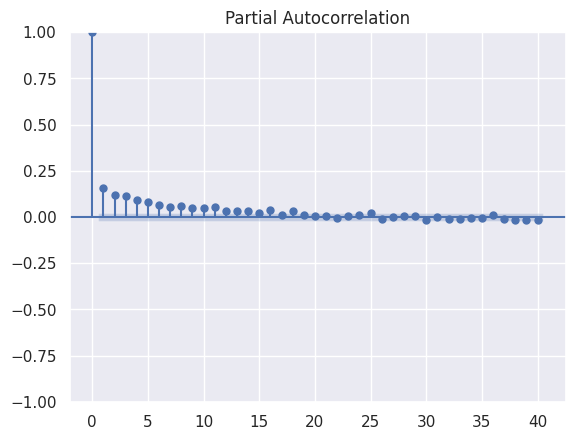

In [ ]:
plot_pacf(telemetryP['pressure'], lags = 40)
plt.show()

***
#**Feature Engineering**#
***

***
##**Feature Engineering on the Telemetry dataset**##
***

 Make sure there are no null values before modeling because it won't work if there are any


In [ ]:
#Calculating 3-hour rolling statistics (mean, max, min) for telemetry data fields (volt, rotate, pressure, vibration) and creating a new DataFrame "telemetry_mean_3h" with the results
#every 3 hours averages can be different
Telemetry["datetime"] = pd.to_datetime(Telemetry['datetime'], format='%Y-%m-%d %H:%M:%S')

def calculate_rolling_statistics(df, col, agg_func, window=3, resample_freq='3H'):
    return (pd.pivot_table(df, index='datetime', columns='machineID', values=col)
            .rolling(window=window)
            .agg(agg_func)
            .resample(resample_freq, closed='left', label='right')
            .agg(agg_func)
            .unstack())

fields = ['volt', 'rotate', 'pressure', 'vibration']
agg_funcs = {'mean': 'mean','max':'max','min':'min'}

telemetry_mean_3h = pd.concat([calculate_rolling_statistics(Telemetry, col, agg_func)
                                for col in fields
                                for agg_func in agg_funcs],
                               axis=1)

telemetry_mean_3h.columns = [f'{col}{agg}_3h' for col in fields for agg in agg_funcs.keys()]
telemetry_mean_3h.reset_index(inplace=True)
telemetry_mean_3h = telemetry_mean_3h.loc[-telemetry_mean_3h['voltmean_3h'].isnull()]

print(telemetry_mean_3h.head(10))

   machineID            datetime  voltmean_3h  voltmax_3h  voltmin_3h  \
0          1 2015-01-01 09:00:00   170.028993  176.217853  162.879223   
1          1 2015-01-01 12:00:00   164.441379  172.504839  157.610021   
2          1 2015-01-01 15:00:00   165.850875  175.324524  156.556031   
3          1 2015-01-01 18:00:00   169.468113  175.324524  160.263954   
4          1 2015-01-01 21:00:00   164.829225  182.739113  153.353492   
5          1 2015-01-02 00:00:00   171.779786  182.739113  151.335682   
6          1 2015-01-02 03:00:00   171.448865  180.097495  151.335682   
7          1 2015-01-02 06:00:00   173.520075  200.872430  158.271400   
8          1 2015-01-02 09:00:00   184.267500  200.872430  160.528861   
9          1 2015-01-02 12:00:00   158.719131  173.394523  147.300678   

   rotatemean_3h  rotatemax_3h  rotatemin_3h  pressuremean_3h  pressuremax_3h  \
0     449.533798    527.349825    402.747490        94.592122      113.077935   
1     421.885806    527.349825    

In [ ]:
telemetry_mean_3h.shape

(292100, 14)

In [ ]:
telemetry_mean_3h.head()

,machineID,datetime,voltmean_3h,voltmax_3h,voltmin_3h,rotatemean_3h,rotatemax_3h,rotatemin_3h,pressuremean_3h,pressuremax_3h,pressuremin_3h,vibrationmean_3h,vibrationmax_3h,vibrationmin_3h
0,1,2015-01-01 09:00:00,170.028993,176.217853,162.879223,449.533798,527.349825,402.747490,94.592122,113.077935,75.237905,40.893502,45.087686,34.178847
1,1,2015-01-01 12:00:00,164.441379,172.504839,157.610021,421.885806,527.349825,346.149335,99.264706,111.886648,75.237905,35.863793,43.413973,25.990511
2,1,2015-01-01 15:00:00,165.850875,175.324524,156.556031,445.681853,499.071623,398.648781,105.737146,111.886648,95.927042,38.000957,45.482287,25.990511
3,1,2015-01-01 18:00:00,169.468113,175.324524,160.263954,422.502848,460.850670,382.483543,104.537422,110.624361,96.480976,41.116341,45.482287,35.482009
4,1,2015-01-01 21:00:00,164.829225,182.739113,153.353492,443.281168,490.672921,382.483543,92.776181,103.780663,86.012440,41.618121,44.108554,38.543681


In [ ]:
#Calculating 24-hour rolling statistics (mean, max, min) for telemetry data fields (volt, rotate, pressure, vibration) and creating a new DataFrame "telemetry_mean_24h" with the results
#average on a daily basis
def calculate_rolling_statistics(df, col, agg_func, window=24, resample_freq='3H'):
    return (pd.pivot_table(df, index='datetime', columns='machineID', values=col)
            .rolling(window=window)
            .agg(agg_func)
            .resample(resample_freq, closed='left', label='right')
            .agg(agg_func)
            .unstack())

fields = ['volt', 'rotate', 'pressure', 'vibration']
agg_funcs = {'mean': 'mean','max':'max','min':'min'}

telemetry_mean_24h = pd.concat([calculate_rolling_statistics(Telemetry, col, agg_func)
                                for col in fields
                                for agg_func in agg_funcs],
                               axis=1)

telemetry_mean_24h.columns = [f'{col}{agg}_24h' for col in fields for agg in agg_funcs.keys()]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h['voltmean_24h'].isnull()]

# Display the resulting DataFrame
print(telemetry_mean_24h.head(10))

    machineID            datetime  voltmean_24h  voltmax_24h  voltmin_24h  \
7           1 2015-01-02 06:00:00    169.733809   200.872430   151.335682   
8           1 2015-01-02 09:00:00    170.700727   200.872430   151.335682   
9           1 2015-01-02 12:00:00    169.985446   200.872430   147.300678   
10          1 2015-01-02 15:00:00    170.960571   200.872430   147.300678   
11          1 2015-01-02 18:00:00    170.245587   200.872430   145.248486   
12          1 2015-01-02 21:00:00    169.578060   200.872430   140.776309   
13          1 2015-01-03 00:00:00    169.095238   200.872430   140.776309   
14          1 2015-01-03 03:00:00    169.885627   200.872430   140.776309   
15          1 2015-01-03 06:00:00    170.636975   200.872430   140.776309   
16          1 2015-01-03 09:00:00    169.697564   194.942847   140.776309   

    rotatemean_24h  rotatemax_24h  rotatemin_24h  pressuremean_24h  \
7       445.179865     527.349825     346.149335         96.797113   
8       445.

In [ ]:
telemetry_mean_24h.head(5)

,machineID,datetime,voltmean_24h,voltmax_24h,voltmin_24h,rotatemean_24h,rotatemax_24h,rotatemin_24h,pressuremean_24h,pressuremax_24h,pressuremin_24h,vibrationmean_24h,vibrationmax_24h,vibrationmin_24h
7,1,2015-01-02 06:00:00,169.733809,200.87243,151.335682,445.179865,527.349825,346.149335,96.797113,113.077935,75.237905,40.385160,52.355876,25.990511
8,1,2015-01-02 09:00:00,170.700727,200.87243,151.335682,445.294112,527.349825,346.149335,97.232172,114.342061,75.237905,39.647643,52.355876,25.990511
9,1,2015-01-02 12:00:00,169.985446,200.87243,147.300678,446.515432,519.452812,382.483543,97.151686,114.342061,78.880780,39.823493,52.355876,25.990511
10,1,2015-01-02 15:00:00,170.960571,200.87243,147.300678,444.937067,519.452812,382.483543,96.499794,114.342061,78.880780,40.230225,52.355876,29.527665
11,1,2015-01-02 18:00:00,170.245587,200.87243,145.248486,451.249384,519.452812,382.483543,96.077177,114.342061,78.880780,39.960667,52.355876,29.527665


In [ ]:
telemetry_mean_24h.shape

(291400, 14)

In [ ]:
#Merging telemetry data with 3-hour and 24-hour rolling statistics, then dropping rows with missing values
telemetry_features = Telemetry.merge(telemetry_mean_3h, on=['datetime', 'machineID'], how='left')\
                              .merge(telemetry_mean_24h, on=['datetime', 'machineID'], how='left')\
                              .dropna()

telemetry_features.head()

,datetime,machineID,volt,rotate,pressure,vibration,voltmean_3h,voltmax_3h,voltmin_3h,rotatemean_3h,...,voltmin_24h,rotatemean_24h,rotatemax_24h,rotatemin_24h,pressuremean_24h,pressuremax_24h,pressuremin_24h,vibrationmean_24h,vibrationmax_24h,vibrationmin_24h
24,2015-01-02 06:00:00,1,197.363125,446.943947,114.342061,29.527665,173.520075,200.872430,158.271400,438.248596,...,151.335682,445.179865,527.349825,346.149335,96.797113,113.077935,75.237905,40.385160,52.355876,25.990511
27,2015-01-02 09:00:00,1,147.300678,420.610792,110.408985,34.203042,184.267500,200.872430,160.528861,443.486076,...,151.335682,445.294112,527.349825,346.149335,97.232172,114.342061,75.237905,39.647643,52.355876,25.990511
30,2015-01-02 12:00:00,1,185.205355,445.606447,105.993247,47.862484,158.719131,173.394523,147.300678,431.656367,...,147.300678,446.515432,519.452812,382.483543,97.151686,114.342061,78.880780,39.823493,52.355876,25.990511
33,2015-01-02 15:00:00,1,180.030715,486.893593,93.743827,43.099758,173.651877,185.205355,152.420775,433.054936,...,147.300678,444.937067,519.452812,382.483543,96.499794,114.342061,78.880780,40.230225,52.355876,29.527665
36,2015-01-02 18:00:00,1,165.258225,493.161428,127.014498,45.135194,163.748237,180.030715,145.248486,473.001386,...,145.248486,451.249384,519.452812,382.483543,96.077177,114.342061,78.880780,39.960667,52.355876,29.527665


In [ ]:
#Dropping columns 'volt', 'rotate', 'pressure', and 'vibration' from the "telemetry_features" DataFrame.
telemetry_features= telemetry_features.drop(['volt', 'rotate', 'pressure', 'vibration'], axis=1)

In [ ]:
telemetry_features.shape

(291300, 26)

In [ ]:
telemetry_features.head()

,datetime,machineID,voltmean_3h,voltmax_3h,voltmin_3h,rotatemean_3h,rotatemax_3h,rotatemin_3h,pressuremean_3h,pressuremax_3h,...,voltmin_24h,rotatemean_24h,rotatemax_24h,rotatemin_24h,pressuremean_24h,pressuremax_24h,pressuremin_24h,vibrationmean_24h,vibrationmax_24h,vibrationmin_24h
24,2015-01-02 06:00:00,1,173.520075,200.872430,158.271400,438.248596,519.452812,403.235951,91.789804,96.535487,...,151.335682,445.179865,527.349825,346.149335,96.797113,113.077935,75.237905,40.385160,52.355876,25.990511
27,2015-01-02 09:00:00,1,184.267500,200.872430,160.528861,443.486076,495.777958,384.645962,102.236790,114.342061,...,151.335682,445.294112,527.349825,346.149335,97.232172,114.342061,75.237905,39.647643,52.355876,25.990511
30,2015-01-02 12:00:00,1,158.719131,173.394523,147.300678,431.656367,486.459056,384.645962,98.620814,110.408985,...,147.300678,446.515432,519.452812,382.483543,97.151686,114.342061,78.880780,39.823493,52.355876,25.990511
33,2015-01-02 15:00:00,1,173.651877,185.205355,152.420775,433.054936,497.840620,385.354924,100.522009,105.993247,...,147.300678,444.937067,519.452812,382.483543,96.499794,114.342061,78.880780,40.230225,52.355876,29.527665
36,2015-01-02 18:00:00,1,163.748237,180.030715,145.248486,473.001386,497.840620,385.354924,101.156487,111.950587,...,145.248486,451.249384,519.452812,382.483543,96.077177,114.342061,78.880780,39.960667,52.355876,29.527665


In [ ]:
duplicate_columns = telemetry_features.columns[telemetry_features.columns.duplicated()]

In [ ]:
duplicate_columns

Index([], dtype='object')

In [ ]:
#Making sure that there are no null values
telemetry_features.isna().sum()

datetime             0
machineID            0
voltmean_3h          0
voltmax_3h           0
voltmin_3h           0
rotatemean_3h        0
rotatemax_3h         0
rotatemin_3h         0
pressuremean_3h      0
pressuremax_3h       0
pressuremin_3h       0
vibrationmean_3h     0
vibrationmax_3h      0
vibrationmin_3h      0
voltmean_24h         0
voltmax_24h          0
voltmin_24h          0
rotatemean_24h       0
rotatemax_24h        0
rotatemin_24h        0
pressuremean_24h     0
pressuremax_24h      0
pressuremin_24h      0
vibrationmean_24h    0
vibrationmax_24h     0
vibrationmin_24h     0
dtype: int64

***
##**Feature Engineering on the Errors dataset**##
***

In [ ]:
#Creating dummy variables for the "error_count" DataFrame, where each unique error type is represented as a binary column.
error_count = pd.get_dummies(errors.set_index('datetime')).reset_index()
error_count.head()
error_count

,datetime,machineID,errorID_error1,errorID_error2,errorID_error3,errorID_error4,errorID_error5
0,2015-01-03 07:00:00,1,1,0,0,0,0
1,2015-01-03 20:00:00,1,0,0,1,0,0
2,2015-01-04 06:00:00,1,0,0,0,0,1
3,2015-01-10 15:00:00,1,0,0,0,1,0
4,2015-01-22 10:00:00,1,0,0,0,1,0
...,...,...,...,...,...,...,...
3914,2015-11-21 08:00:00,100,0,1,0,0,0
3915,2015-12-04 02:00:00,100,1,0,0,0,0
3916,2015-12-08 06:00:00,100,0,1,0,0,0
3917,2015-12-08 06:00:00,100,0,0,1,0,0


In [ ]:
#Renaming columns in the "error_count" DataFrame and aggregating error counts for each machine and datetime

error_count.columns = ['datetime', 'machineID','error1', 'error2', 'error3', 'error4', 'error5']

#Combining errors for a given machine in a given hour
error_count = error_count.groupby(['machineID', 'datetime']).sum().reset_index()

In [ ]:
error_count.head(10)

,machineID,datetime,error1,error2,error3,error4,error5
0,1,2015-01-03 07:00:00,1,0,0,0,0
1,1,2015-01-03 20:00:00,0,0,1,0,0
2,1,2015-01-04 06:00:00,0,0,0,0,1
3,1,2015-01-10 15:00:00,0,0,0,1,0
4,1,2015-01-22 10:00:00,0,0,0,1,0
5,1,2015-01-25 15:00:00,0,0,0,1,0
6,1,2015-01-27 04:00:00,1,0,0,0,0
7,1,2015-03-03 22:00:00,0,1,0,0,0
8,1,2015-03-05 06:00:00,1,0,0,0,0
9,1,2015-03-20 18:00:00,1,0,0,0,0


In [ ]:
error_count.shape

(3616, 7)

In [ ]:
#Merging error counts with the Telemetry dataset based on datetime and machineID
error_count = Telemetry[['datetime', 'machineID']].merge(
    error_count, on=['machineID', 'datetime'], how='left').fillna(0.0)
error_count.describe()

,machineID,error1,error2,error3,error4,error5
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,0.001153,0.001128,0.000957,0.000830,0.000406
std,28.866087,0.033934,0.033563,0.030913,0.028795,0.020154
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Resampling error counts over 3-hour intervals, applying rolling sum with a 24-hour window
temp = []
fields = ['error%d' % i for i in range(1, 6)]
for col in fields:
    temp.append(
        pd.pivot_table(error_count, index='datetime', columns='machineID', values=col)
        .resample('3H', closed='left', label='right').first()
        .unstack().rolling(window=24, center=False).sum()
    )

error_count = pd.concat(temp, axis=1)
error_count.columns = [i + 'count' for i in fields]
error_count.reset_index(inplace=True)
error_count = error_count.dropna()
error_count.describe()

,machineID,error1count,error2count,error3count,error4count,error5count
count,292077.000000,292077.000000,292077.000000,292077.000000,292077.000000,292077.000000
mean,50.503898,0.038538,0.040181,0.036073,0.026130,0.019885
std,28.863914,0.196051,0.199343,0.189151,0.161103,0.140315
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,2.000000,2.000000,2.000000,3.000000,2.000000


In [ ]:
error_count.head()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
23,1,2015-01-04 06:00:00,0.0,0.0,0.0,0.0,0.0
24,1,2015-01-04 09:00:00,0.0,0.0,0.0,0.0,1.0
25,1,2015-01-04 12:00:00,0.0,0.0,0.0,0.0,1.0
26,1,2015-01-04 15:00:00,0.0,0.0,0.0,0.0,1.0
27,1,2015-01-04 18:00:00,0.0,0.0,0.0,0.0,1.0


In [ ]:
error_count.isna().sum()

machineID      0
datetime       0
error1count    0
error2count    0
error3count    0
error4count    0
error5count    0
dtype: int64

In [ ]:
temp

[machineID  datetime           
 1          2015-01-01 09:00:00    NaN
            2015-01-01 12:00:00    NaN
            2015-01-01 15:00:00    NaN
            2015-01-01 18:00:00    NaN
            2015-01-01 21:00:00    NaN
                                  ... 
 100        2015-12-31 21:00:00    0.0
            2016-01-01 00:00:00    0.0
            2016-01-01 03:00:00    0.0
            2016-01-01 06:00:00    0.0
            2016-01-01 09:00:00    0.0
 Length: 292100, dtype: float64,
 machineID  datetime           
 1          2015-01-01 09:00:00    NaN
            2015-01-01 12:00:00    NaN
            2015-01-01 15:00:00    NaN
            2015-01-01 18:00:00    NaN
            2015-01-01 21:00:00    NaN
                                  ... 
 100        2015-12-31 21:00:00    0.0
            2016-01-01 00:00:00    0.0
            2016-01-01 03:00:00    0.0
            2016-01-01 06:00:00    0.0
            2016-01-01 09:00:00    0.0
 Length: 292100, dtype: float64,
 machineID  

***
##**Feature Engineering on the Maint dataset**##
***

**Finding components replaced**

In [ ]:
#Creating maintenance features, including columns for each component, combining repairs for a machine in a given hour, handling missing values, and deriving time since the last component change
# Create a column for each error type
maintenance_features = pd.get_dummies(maintenance.set_index('datetime')).reset_index()
maintenance_features.columns = ['datetime', 'machineID', 'comp1', 'comp2', 'comp3', 'comp4']

# Combine repairs for a given machine in a given hour
maintenance_features = maintenance_features.groupby(['machineID', 'datetime']).sum().reset_index()

# Convert 'datetime' column to datetime type
Telemetry['datetime'] = pd.to_datetime(Telemetry['datetime'])

# Add timepoints where no components were replaced
maintenance_features = Telemetry[['datetime', 'machineID']].merge(maintenance_features,
                                                      on=['datetime', 'machineID'],
                                                      how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])

components = ['comp1', 'comp2', 'comp3', 'comp4']
for comp in components:
    # Convert indicator to most recent date of component change
    maintenance_features.loc[maintenance_features[comp] < 1, comp] = None
    maintenance_features.loc[-maintenance_features[comp].isnull(), comp] = maintenance_features.loc[-maintenance_features[comp].isnull(), 'datetime']

    # Forward-fill the most-recent date of component change
    maintenance_features[comp] = maintenance_features[comp].fillna(method='ffill')

# Remove dates in 2014 (may have NaN or future component change dates)
maintenance_features = maintenance_features.loc[maintenance_features['datetime'] > pd.to_datetime('2015-01-01')]

# Replace dates of most recent component change with hours since the previous maintenance
for comp in components:
    maintenance_features[comp] = (maintenance_features['datetime'] - maintenance_features[comp]).dt.total_seconds() / 3600.0

# Rename the columns
new_columns = {f'{comp}': f'hapm_{comp}' for comp in components}
maintenance_features.rename(columns=new_columns, inplace=True)

maintenance_features.describe()

<ipython-input-91-581c149d82e1>:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,machineID,hapm_comp1,hapm_comp2,hapm_comp3,hapm_comp4
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,1284.604452,1236.979340,1265.423080,1292.020591
std,28.866087,1499.800290,1422.462106,1412.954744,1432.991482
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,319.000000,291.000000,315.000000,312.000000
50%,50.500000,787.000000,712.000000,775.000000,780.000000
75%,75.250000,1649.000000,1597.000000,1616.000000,1691.000000
max,100.000000,11807.000000,8375.000000,8903.000000,9479.000000


In [ ]:
maintenance_features.head()

,datetime,machineID,hapm_comp1,hapm_comp2,hapm_comp3,hapm_comp4
0,2015-01-01 06:00:00,1,456.0,5136.0,3696.0,4056.0
1,2015-01-01 07:00:00,1,457.0,5137.0,3697.0,4057.0
2,2015-01-01 08:00:00,1,458.0,5138.0,3698.0,4058.0
3,2015-01-01 09:00:00,1,459.0,5139.0,3699.0,4059.0
4,2015-01-01 10:00:00,1,460.0,5140.0,3700.0,4060.0


In [ ]:
maintenance_features.isna().sum()

datetime      0
machineID     0
hapm_comp1    0
hapm_comp2    0
hapm_comp3    0
hapm_comp4    0
dtype: int64

In [ ]:
maintenance_features.shape

(876100, 6)

shows how the machine to different component replaced looks like

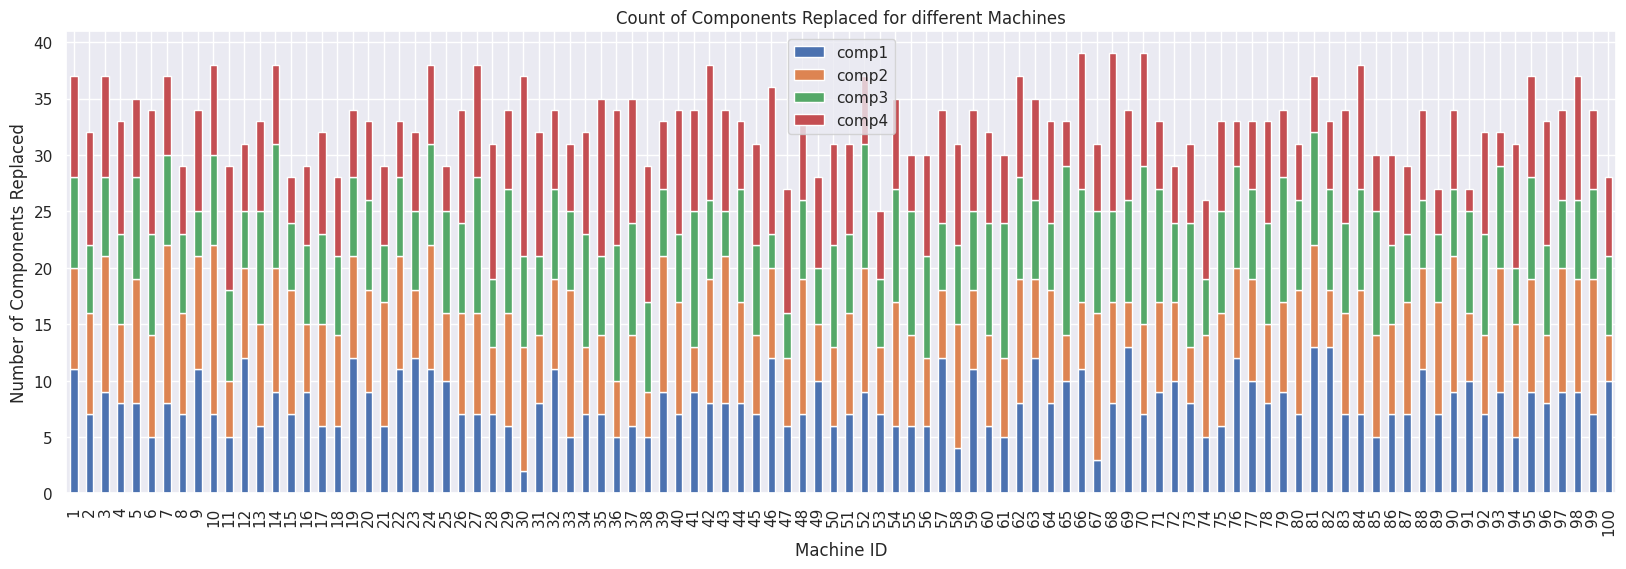

In [ ]:
maintenance= maintenance.groupby(["machineID", "comp"]).size().reset_index()
maintenance.columns = ["machineID", "comp", "num_comp"]
maintenance_pivot = pd.pivot(maintenance, index="machineID", columns="comp", values="num_comp").rename_axis(None, axis=1)

maintenance_pivot.plot.bar(stacked=True, figsize=(20, 6), title="Count of Components Replaced for different Machines")
plt.xlabel("Machine ID")
plt.ylabel("Number of Components Replaced")
plt.show()


***
##**Feature Engineering on the Machines dataset**##
***

In [ ]:
#Merging telemetry features, error count, maintenance features, and machine information into a final dataset
final_features= telemetry_features.merge(error_count, on=['datetime', 'machineID'], how='left')
final_features = final_features.merge(maintenance_features, on=['datetime', 'machineID'], how='left')
final_features = final_features.merge(machines, on=['machineID'], how='left')

print(final_features.head())
final_features.describe()


             datetime  machineID  voltmean_3h  voltmax_3h  voltmin_3h  \
0 2015-01-02 06:00:00          1   173.520075  200.872430  158.271400   
1 2015-01-02 09:00:00          1   184.267500  200.872430  160.528861   
2 2015-01-02 12:00:00          1   158.719131  173.394523  147.300678   
3 2015-01-02 15:00:00          1   173.651877  185.205355  152.420775   
4 2015-01-02 18:00:00          1   163.748237  180.030715  145.248486   

   rotatemean_3h  rotatemax_3h  rotatemin_3h  pressuremean_3h  pressuremax_3h  \
0     438.248596    519.452812    403.235951        91.789804       96.535487   
1     443.486076    495.777958    384.645962       102.236790      114.342061   
2     431.656367    486.459056    384.645962        98.620814      110.408985   
3     433.054936    497.840620    385.354924       100.522009      105.993247   
4     473.001386    497.840620    385.354924       101.156487      111.950587   

   ...  error2count  error3count  error4count  error5count  hapm_comp1  \


,machineID,voltmean_3h,voltmax_3h,voltmin_3h,rotatemean_3h,rotatemax_3h,rotatemin_3h,pressuremean_3h,pressuremax_3h,pressuremin_3h,...,error1count,error2count,error3count,error4count,error5count,hapm_comp1,hapm_comp2,hapm_comp3,hapm_comp4,age
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,...,291284.000000,291284.000000,291284.000000,291284.000000,291284.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,170.771519,188.256229,153.308173,446.613743,504.977819,388.236130,100.855159,112.522317,89.181745,...,0.038471,0.040246,0.036106,0.026122,0.019912,1280.417961,1231.655118,1260.290587,1286.858826,11.330000
std,28.86612,8.233786,10.812471,10.718369,29.092501,37.052949,37.209583,6.693362,8.227724,8.068333,...,0.195903,0.199501,0.189239,0.161084,0.140408,1498.033522,1419.377832,1410.381699,1430.565253,5.827625
min,1.00000,136.268613,144.061109,97.333604,208.917145,259.715042,138.432075,76.216024,84.284903,51.237106,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,165.338016,180.765730,146.486938,431.047991,482.017792,366.642703,96.825553,107.127630,84.280396,...,0.000000,0.000000,0.000000,0.000000,0.000000,318.000000,288.000000,312.000000,309.000000,6.750000
50%,50.50000,170.360423,187.434587,153.489787,448.599068,504.943028,391.411411,100.204713,111.577381,88.962887,...,0.000000,0.000000,0.000000,0.000000,0.000000,783.000000,708.000000,771.000000,777.000000,12.000000
75%,75.25000,175.608980,194.813036,160.248882,465.415803,528.364553,413.866008,103.692423,116.541456,93.498430,...,0.000000,0.000000,0.000000,0.000000,0.000000,1644.000000,1590.000000,1608.000000,1683.000000,16.000000
max,100.00000,230.132990,255.124717,220.632286,567.470816,695.020984,532.623141,163.916000,185.951998,157.683508,...,2.000000,2.000000,2.000000,3.000000,2.000000,11805.000000,8373.000000,8901.000000,9477.000000,20.000000


In [ ]:
final_features.isna().sum()

datetime              0
machineID             0
voltmean_3h           0
voltmax_3h            0
voltmin_3h            0
rotatemean_3h         0
rotatemax_3h          0
rotatemin_3h          0
pressuremean_3h       0
pressuremax_3h        0
pressuremin_3h        0
vibrationmean_3h      0
vibrationmax_3h       0
vibrationmin_3h       0
voltmean_24h          0
voltmax_24h           0
voltmin_24h           0
rotatemean_24h        0
rotatemax_24h         0
rotatemin_24h         0
pressuremean_24h      0
pressuremax_24h       0
pressuremin_24h       0
vibrationmean_24h     0
vibrationmax_24h      0
vibrationmin_24h      0
error1count          16
error2count          16
error3count          16
error4count          16
error5count          16
hapm_comp1            0
hapm_comp2            0
hapm_comp3            0
hapm_comp4            0
model                 0
age                   0
dtype: int64

In [ ]:
#Filling specified error counts with zeros in the final dataset where there were missing values.
columns_to_fill_with_zero = ["error1count", "error2count", "error3count", "error4count", "error5count"]
final_features[columns_to_fill_with_zero] = final_features[columns_to_fill_with_zero].fillna(0)


In [ ]:
final_features.isna().sum()

datetime             0
machineID            0
voltmean_3h          0
voltmax_3h           0
voltmin_3h           0
rotatemean_3h        0
rotatemax_3h         0
rotatemin_3h         0
pressuremean_3h      0
pressuremax_3h       0
pressuremin_3h       0
vibrationmean_3h     0
vibrationmax_3h      0
vibrationmin_3h      0
voltmean_24h         0
voltmax_24h          0
voltmin_24h          0
rotatemean_24h       0
rotatemax_24h        0
rotatemin_24h        0
pressuremean_24h     0
pressuremax_24h      0
pressuremin_24h      0
vibrationmean_24h    0
vibrationmax_24h     0
vibrationmin_24h     0
error1count          0
error2count          0
error3count          0
error4count          0
error5count          0
hapm_comp1           0
hapm_comp2           0
hapm_comp3           0
hapm_comp4           0
model                0
age                  0
dtype: int64

In [ ]:
len(final_features.columns)

37

In [ ]:
final_features.shape

(291300, 37)

***
# Label Engineering
***

***
### Using Failures.csv for the labels
***

In [ ]:
#Creating labeled features by merging with failures data, filling missing values backward up to 24 hours, and replacing remaining NaNs with 'none'.
labeled_features = final_features.merge(failures, on=['datetime', 'machineID'], how='left')
labeled_features = labeled_features.fillna(method='bfill', limit=7) # fill backward up to 24h
labeled_features = labeled_features.fillna('none')
labeled_features.head()

,datetime,machineID,voltmean_3h,voltmax_3h,voltmin_3h,rotatemean_3h,rotatemax_3h,rotatemin_3h,pressuremean_3h,pressuremax_3h,...,error3count,error4count,error5count,hapm_comp1,hapm_comp2,hapm_comp3,hapm_comp4,model,age,failure
0,2015-01-02 06:00:00,1,173.520075,200.872430,158.271400,438.248596,519.452812,403.235951,91.789804,96.535487,...,0.0,0.0,0.0,480.0,5160.0,3720.0,4080.0,model3,18,none
1,2015-01-02 09:00:00,1,184.267500,200.872430,160.528861,443.486076,495.777958,384.645962,102.236790,114.342061,...,0.0,0.0,0.0,483.0,5163.0,3723.0,4083.0,model3,18,none
2,2015-01-02 12:00:00,1,158.719131,173.394523,147.300678,431.656367,486.459056,384.645962,98.620814,110.408985,...,0.0,0.0,0.0,486.0,5166.0,3726.0,4086.0,model3,18,none
3,2015-01-02 15:00:00,1,173.651877,185.205355,152.420775,433.054936,497.840620,385.354924,100.522009,105.993247,...,0.0,0.0,0.0,489.0,5169.0,3729.0,4089.0,model3,18,none
4,2015-01-02 18:00:00,1,163.748237,180.030715,145.248486,473.001386,497.840620,385.354924,101.156487,111.950587,...,0.0,0.0,0.0,492.0,5172.0,3732.0,4092.0,model3,18,none


In [ ]:
#Swapping the positions of the "model" and "age" columns in the labeled features DataFrame
columns = list(labeled_features.columns)

# Finding the indices of "model" and "age" columns
model_index = columns.index("model")
age_index = columns.index("age")

# Swapping the positions
columns[model_index], columns[age_index] = columns[age_index], columns[model_index]

# Reordering the DataFrame with the new column order
labeled_features = labeled_features[columns]

In [ ]:
labeled_features.columns

Index(['datetime', 'machineID', 'voltmean_3h', 'voltmax_3h', 'voltmin_3h',
       'rotatemean_3h', 'rotatemax_3h', 'rotatemin_3h', 'pressuremean_3h',
       'pressuremax_3h', 'pressuremin_3h', 'vibrationmean_3h',
       'vibrationmax_3h', 'vibrationmin_3h', 'voltmean_24h', 'voltmax_24h',
       'voltmin_24h', 'rotatemean_24h', 'rotatemax_24h', 'rotatemin_24h',
       'pressuremean_24h', 'pressuremax_24h', 'pressuremin_24h',
       'vibrationmean_24h', 'vibrationmax_24h', 'vibrationmin_24h',
       'error1count', 'error2count', 'error3count', 'error4count',
       'error5count', 'hapm_comp1', 'hapm_comp2', 'hapm_comp3', 'hapm_comp4',
       'age', 'model', 'failure'],
      dtype='object')

In [ ]:
labeled_features["failure"].value_counts()

none     285684
comp2      1985
comp1      1464
comp4      1240
comp3       968
Name: failure, dtype: int64

In [ ]:
final_features.reset_index(drop=True, inplace=True)
labeled_features.reset_index(drop=True, inplace=True)

In [ ]:
print(len(final_features), len(labeled_features))

291300 291341


In [ ]:
labeled_features.shape

(291341, 38)

***
#**Machine Learning Modeling**#
***

***
##**Applying GradientBoost**##
***

In [ ]:
# Defining threshold dates for test and training splits
threshold_dates = [
    [pd.to_datetime('2015-07-31 01:00:00'), pd.to_datetime('2015-08-01 01:00:00')],
    [pd.to_datetime('2015-08-31 01:00:00'), pd.to_datetime('2015-09-01 01:00:00')],
    [pd.to_datetime('2015-09-30 01:00:00'), pd.to_datetime('2015-10-01 01:00:00')]
]

for last_train_date, first_test_date in threshold_dates:
    # Splitting data into training and test sets
    train_data = labeled_features[labeled_features['datetime'] < last_train_date]
    y_train = train_data['failure']
    X_train = pd.get_dummies(train_data.drop(['datetime', 'machineID', 'failure'], axis=1))

    test_data = labeled_features[labeled_features['datetime'] > first_test_date]
    X_test = pd.get_dummies(test_data.drop(['datetime', 'machineID', 'failure'], axis=1))
    y_test = test_data['failure']


In [ ]:
X_train.columns

Index(['voltmean_3h', 'voltmax_3h', 'voltmin_3h', 'rotatemean_3h',
       'rotatemax_3h', 'rotatemin_3h', 'pressuremean_3h', 'pressuremax_3h',
       'pressuremin_3h', 'vibrationmean_3h', 'vibrationmax_3h',
       'vibrationmin_3h', 'voltmean_24h', 'voltmax_24h', 'voltmin_24h',
       'rotatemean_24h', 'rotatemax_24h', 'rotatemin_24h', 'pressuremean_24h',
       'pressuremax_24h', 'pressuremin_24h', 'vibrationmean_24h',
       'vibrationmax_24h', 'vibrationmin_24h', 'error1count', 'error2count',
       'error3count', 'error4count', 'error5count', 'hapm_comp1', 'hapm_comp2',
       'hapm_comp3', 'hapm_comp4', 'age', 'model_model1', 'model_model2',
       'model_model3', 'model_model4'],
      dtype='object')

In [ ]:
# Feature Scalling
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
X_train.shape

(216732, 38)

In [ ]:
X_train

array([[ 0.33263043,  1.167595  ,  0.46051506, ..., -0.45258118,
         1.36282833, -0.68597805],
       [ 1.6388716 ,  1.167595  ,  0.67126844, ..., -0.45258118,
         1.36282833, -0.68597805],
       [-1.46627509, -1.37196988, -0.56369643, ..., -0.45258118,
         1.36282833, -0.68597805],
       ...,
       [ 0.37183747,  0.57008825,  0.02810707, ..., -0.45258118,
        -0.73376813,  1.45777259],
       [-1.86912505, -1.75346032, -0.98477194, ..., -0.45258118,
        -0.73376813,  1.45777259],
       [ 0.6393185 , -0.28045039,  0.52753123, ..., -0.45258118,
        -0.73376813,  1.45777259]])

In [ ]:
y_train.shape

(216732,)

In [ ]:
y_train

0         none
1         none
2         none
3         none
4         none
          ... 
290590    none
290591    none
290592    none
290593    none
290594    none
Name: failure, Length: 216732, dtype: object

In [ ]:
X_test.shape

(73809, 38)

In [ ]:
# Training the model and making predictions

from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_predict = gb_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
y_test = test_data['failure']
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9855844138248723


col_0,comp1,comp2,comp3,comp4,none
failure,,,,,
comp1,283,2,1,4,30
comp2,0,538,0,2,16
comp3,0,0,201,1,22
comp4,0,3,1,268,8
none,194,302,147,331,71455


***
##**Applying Random Forest**##
***

In [ ]:
# Training model with RandomForest
from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Evaluating accuracy
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9855844138248723


In [ ]:
y_test = test_data['failure']
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9855844138248723


col_0,comp1,comp2,comp3,comp4,none
failure,,,,,
comp1,283,2,1,4,30
comp2,0,538,0,2,16
comp3,0,0,201,1,22
comp4,0,3,1,268,8
none,194,302,147,331,71455


In [ ]:
 # Generating and printing confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[  283     2     1     4    30]
 [    0   538     0     2    16]
 [    0     0   201     1    22]
 [    0     3     1   268     8]
 [  194   302   147   331 71455]]


***
##**Applying ANN**##
***

In [ ]:
# Applying OneHotEncoder for model and failuler for ANN as ANN can not have strings
labeled_features_temp = pd.get_dummies(labeled_features[['model', 'failure', 'datetime', 'machineID']].set_index('datetime')).reset_index()

In [ ]:
labeled_features_temp.head()

,datetime,machineID,model_model1,model_model2,model_model3,model_model4,failure_comp1,failure_comp2,failure_comp3,failure_comp4,failure_none
0,2015-01-02 06:00:00,1,0,0,1,0,0,0,0,0,1
1,2015-01-02 09:00:00,1,0,0,1,0,0,0,0,0,1
2,2015-01-02 12:00:00,1,0,0,1,0,0,0,0,0,1
3,2015-01-02 15:00:00,1,0,0,1,0,0,0,0,0,1
4,2015-01-02 18:00:00,1,0,0,1,0,0,0,0,0,1


In [ ]:
labeled_features_temp.shape

(291341, 11)

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

labeled_features_ann = labeled_features.merge(labeled_features_temp, on=['datetime', 'machineID'], how='left')

# Filling remaining missing values with 'none'
labeled_features_ann.fillna('none', inplace=True)

labeled_features_ann=labeled_features_ann.drop(['model', 'failure'], axis=1)

# Defining threshold dates for test and training splits
threshold_dates = [
    [pd.to_datetime('2015-07-31 01:00:00'), pd.to_datetime('2015-08-01 01:00:00')],
    [pd.to_datetime('2015-08-31 01:00:00'), pd.to_datetime('2015-09-01 01:00:00')],
    [pd.to_datetime('2015-09-30 01:00:00'), pd.to_datetime('2015-10-01 01:00:00')]
]

for last_train_date, first_test_date in threshold_dates:
    # Splitting data into training and test sets
    train_data = labeled_features_ann[labeled_features_ann['datetime'] < last_train_date]
    y_train_ann = train_data[['failure_comp1', 'failure_comp2', 'failure_comp3', 'failure_comp4', 'failure_none']].values
    X_train_ann = pd.get_dummies(train_data.drop(['datetime', 'machineID', 'failure_comp1', 'failure_comp2', 'failure_comp3', 'failure_comp4', 'failure_none'], axis=1))

    test_data = labeled_features_ann[(labeled_features_ann['datetime'] > first_test_date) & (labeled_features_ann['datetime'] < first_test_date + pd.DateOffset(days=1))]
    X_test_ann = pd.get_dummies(test_data.drop(['datetime', 'machineID', 'failure_comp1', 'failure_comp2', 'failure_comp3', 'failure_comp4', 'failure_none'], axis=1))
    y_test_ann = test_data[['failure_comp1', 'failure_comp2', 'failure_comp3', 'failure_comp4', 'failure_none']].values

In [ ]:
labeled_features_ann.head()

,datetime,machineID,voltmean_3h,voltmax_3h,voltmin_3h,rotatemean_3h,rotatemax_3h,rotatemin_3h,pressuremean_3h,pressuremax_3h,...,age,model_model1,model_model2,model_model3,model_model4,failure_comp1,failure_comp2,failure_comp3,failure_comp4,failure_none
0,2015-01-02 06:00:00,1,173.520075,200.872430,158.271400,438.248596,519.452812,403.235951,91.789804,96.535487,...,18,0,0,1,0,0,0,0,0,1
1,2015-01-02 09:00:00,1,184.267500,200.872430,160.528861,443.486076,495.777958,384.645962,102.236790,114.342061,...,18,0,0,1,0,0,0,0,0,1
2,2015-01-02 12:00:00,1,158.719131,173.394523,147.300678,431.656367,486.459056,384.645962,98.620814,110.408985,...,18,0,0,1,0,0,0,0,0,1
3,2015-01-02 15:00:00,1,173.651877,185.205355,152.420775,433.054936,497.840620,385.354924,100.522009,105.993247,...,18,0,0,1,0,0,0,0,0,1
4,2015-01-02 18:00:00,1,163.748237,180.030715,145.248486,473.001386,497.840620,385.354924,101.156487,111.950587,...,18,0,0,1,0,0,0,0,0,1


In [ ]:
labeled_features_ann.shape

(291423, 45)

In [ ]:
# Feature Scaling
sc = StandardScaler()
X_train_annf = sc.fit_transform(X_train_ann)
X_test_annf = sc.fit_transform(X_test_ann)

In [ ]:
X_train_annf.shape

(216796, 38)

In [ ]:
X_train_annf

array([[ 0.33220629,  1.16700555,  0.46025183, ..., -0.45260426,
         1.36294438, -0.68594548],
       [ 1.63805282,  1.16700555,  0.67097214, ..., -0.45260426,
         1.36294438, -0.68594548],
       [-1.46615573, -1.37189035, -0.56379896, ..., -0.45260426,
         1.36294438, -0.68594548],
       ...,
       [ 0.37140149,  0.56965619,  0.02791168, ..., -0.45260426,
        -0.73370566,  1.45784181],
       [-1.86888399, -1.7532803 , -0.9848084 , ..., -0.45260426,
        -0.73370566,  1.45784181],
       [ 0.63880171, -0.2806584 ,  0.52725748, ..., -0.45260426,
        -0.73370566,  1.45784181]])

In [ ]:
y_train_ann.shape

(216796, 5)

In [ ]:
y_train_ann

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]], dtype=uint8)

In [ ]:
# Training model with ANN
ann = tf.keras.models.Sequential()

# Build the neural network model
ann.add(tf.keras.layers.Dense(units=38, activation='relu', input_dim=X_train_annf.shape[1]))
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann.add(tf.keras.layers.Dense(units=5, activation='softmax'))

# Compilling the model
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
ann.fit(X_train_annf, y_train_ann, epochs=5, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/5
6098/6098 - 19s - loss: 0.0254 - accuracy: 0.9923 - val_loss: 0.0155 - val_accuracy: 0.9932 - 19s/epoch - 3ms/step
Epoch 2/5
6098/6098 - 16s - loss: 0.0085 - accuracy: 0.9968 - val_loss: 0.0118 - val_accuracy: 0.9958 - 16s/epoch - 3ms/step
Epoch 3/5
6098/6098 - 17s - loss: 0.0073 - accuracy: 0.9971 - val_loss: 0.0138 - val_accuracy: 0.9955 - 17s/epoch - 3ms/step
Epoch 4/5
6098/6098 - 16s - loss: 0.0064 - accuracy: 0.9974 - val_loss: 0.0129 - val_accuracy: 0.9952 - 16s/epoch - 3ms/step
Epoch 5/5
6098/6098 - 16s - loss: 0.0061 - accuracy: 0.9977 - val_loss: 0.0118 - val_accuracy: 0.9960 - 16s/epoch - 3ms/step


In [ ]:
# Evaluating the model on the test set
evaluation = ann.evaluate(X_test_annf, y_test_ann)
print("Test Accuracy:", evaluation[1])

25/25 [==============================] - 0s 2ms/step - loss: 0.0136 - accuracy: 0.9950
Test Accuracy: 0.9950000047683716


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Making predictions on the test data using the trained model
predicted_probabilities = ann.predict(X_test_annf)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

y_test_indices = np.argmax(y_test_ann, axis=1)

# Calculating and display confusion matrix
cm = confusion_matrix(y_test_indices, predicted_labels)
print('Confusion matrix:\n', cm)

# Calculating accuracy score
accuracy = accuracy_score(y_test_indices, predicted_labels)
print('Accuracy Score:', accuracy)

25/25 [==============================] - 0s 2ms/step
Confusion matrix:
 [[ 14   0   0   0   0]
 [  0   6   0   0   2]
 [  0   0  11   0   1]
 [  0   0   0   2   0]
 [  0   0   0   1 763]]
Accuracy Score: 0.995


***
#**Applying SMOTE on the Random Forrest**#
***

In [ ]:
pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)


In [ ]:
from collections import Counter

print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({'none': 212475, 'comp2': 1423, 'comp1': 1138, 'comp4': 954, 'comp3': 742})
After SMOTE : Counter({'none': 212475, 'comp4': 212475, 'comp1': 212475, 'comp2': 212475, 'comp3': 212475})


In [ ]:
# Testing RandomForest after SMOTE
rf_classifier.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Evaluating accuracy
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9855844138248723


In [ ]:
y_predict = rf_classifier.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9884566922733


col_0,comp1,comp2,comp3,comp4,none
failure,,,,,
comp1,287,0,0,5,28
comp2,1,31,0,22,502
comp3,1,0,64,8,151
comp4,0,0,0,270,10
none,76,1,0,47,72305


In [ ]:
# Generating and printing confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[  287     0     0     5    28]
 [    1    31     0    22   502]
 [    1     0    64     8   151]
 [    0     0     0   270    10]
 [   76     1     0    47 72305]]


In [ ]:
X_train_smote.shape

(1062375, 38)

In [ ]:
y_train_smote.shape

(1062375,)

***
#**Applying SMOTE on the Gradient Boosting**#
***

In [ ]:

gb_classifier.fit(X_train_smote,y_train_smote)


In [ ]:
y_predict = gb_classifier.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Evaluating accuracy
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy}')